In [167]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.2                         
year           2023                        
month          10                          
day            31                          
svn rev        85441                       
language       R                           
version.string R version 4.3.2 (2023-10-31)
nickname       Eye Holes                   

##**External Data Joining (2.5 pts)**
Download and join this datafile to your dataset. This is to help you perform your EDA - don’t use these geography variables for modeling, please.

In [168]:
census_data <- read.csv('/content/us census bureau regions and divisions.csv')

In [169]:
head(census_data)

,State,State.Code,Region,Division
,<chr>,<chr>,<chr>,<chr>
1,Alaska,AK,West,Pacific
2,Alabama,AL,South,East South Central
3,Arkansas,AR,South,West South Central
4,Arizona,AZ,West,Mountain
5,California,CA,West,Pacific
6,Colorado,CO,West,Mountain


In [171]:
data <- read.csv('/content/PLACES_county_cleanheader.csv')

In [172]:
colnames(data)

[1] "StateAbbr"                                                                                                                                                                                     
 [2] "LocationName"                                                                                                                                                                                  
 [3] "All.teeth.lost.among.adults.aged...65.years"                                                                                                                                                   
 [4] "Arthritis.among.adults.aged...18.years"                                                                                                                                                        
 [5] "Binge.drinking.among.adults.aged...18.years"                                                                                                                                                   
 [6] "Cancer..excluding.skin.cancer..among.adults.aged...18.years"                                                                                                                                   
 [7] "Cervical.cancer.screening.among.adult.women.aged.21.65.years"                                                                                                                                  
 [8] "Cholesterol.screening.among.adults.aged...18.years"                                                                                                                                            
 [9] "Chronic.kidney.disease.among.adults.aged...18.years"                                                                                                                                           
[10] "Chronic.obstructive.pulmonary.disease.among.adults.aged...18.years"                                                                                                                            
[11] "Coronary.heart.disease.among.adults.aged...18.years"                                                                                                                                           
[12] "Current.asthma.among.adults.aged...18.years"                                                                                                                                                   
[13] "Current.lack.of.health.insurance.among.adults.aged.18.64.years"                                                                                                                                
[14] "Current.smoking.among.adults.aged...18.years"                                                                                                                                                  
[15] "Diagnosed.diabetes.among.adults.aged...18.years"                                                                                                                                               
[16] "Fecal.occult.blood.test..sigmoidoscopy..or.colonoscopy.among.adults.aged.50.75.years"                                                                                                          
[17] "High.blood.pressure.among.adults.aged...18.years"                                                                                                                                              
[18] "High.cholesterol.among.adults.aged...18.years.who.have.been.screened.in.the.past.5.years"                                                                                                      
[19] "Mammography.use.among.women.aged.50.74.years"                                                                                                                                                  
[20] "Mental.health.not.good.for...14.days.among.adults.aged...18.years"                                                                                                                             
[21] "No.leisure.time.physical.activity.a

In [173]:
head(data)

,StateAbbr,LocationName,All.teeth.lost.among.adults.aged...65.years,Arthritis.among.adults.aged...18.years,Binge.drinking.among.adults.aged...18.years,Cancer..excluding.skin.cancer..among.adults.aged...18.years,Cervical.cancer.screening.among.adult.women.aged.21.65.years,Cholesterol.screening.among.adults.aged...18.years,Chronic.kidney.disease.among.adults.aged...18.years,Chronic.obstructive.pulmonary.disease.among.adults.aged...18.years,⋯,No.leisure.time.physical.activity.among.adults.aged...18.years,Obesity.among.adults.aged...18.years,Older.adult.men.aged...65.years.who.are.up.to.date.on.a.core.set.of.clinical.preventive.services..Flu.shot.past.year..PPV.shot.ever..Colorectal.cancer.screening,Older.adult.women.aged...65.years.who.are.up.to.date.on.a.core.set.of.clinical.preventive.services..Flu.shot.past.year..PPV.shot.ever..Colorectal.cancer.screening..and.Mammogram.past.2.years,Physical.health.not.good.for...14.days.among.adults.aged...18.years,Sleeping.less.than.7.hours.among.adults.aged...18.years,Stroke.among.adults.aged...18.years,Taking.medicine.for.high.blood.pressure.control.among.adults.aged...18.years.with.high.blood.pressure,Visits.to.dentist.or.dental.clinic.among.adults.aged...18.years,Visits.to.doctor.for.routine.checkup.within.the.past.year.among.adults.aged...18.years
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SD,Walworth,14.7,22.9,23.4,6.6,85.4,74.6,2.6,5.4,⋯,22.8,31.6,22.4,21.7,10.5,31.4,3.0,57.7,67.6,72.0
2,SD,Campbell,12.6,20.9,23.3,6.5,86.6,75.1,2.3,4.8,⋯,21.2,31.0,24.2,23.6,9.1,28.7,2.6,57.1,70.9,71.0
3,SD,Sully,11.6,21.3,23.5,6.6,87.1,75.9,2.4,4.7,⋯,20.3,31.8,24.7,22.7,9.0,29.2,2.6,57.0,71.9,71.7
4,TX,Childress,18.8,24.4,18.2,6.1,80.9,77.8,3.2,7.9,⋯,30.1,38.5,17.3,17.2,14.6,37.8,3.6,57.9,50.2,71.2
5,ND,Emmons,14.4,25.7,22.6,6.5,82.6,75.2,2.6,6.4,⋯,25.0,36.1,24.4,24.1,11.4,32.2,3.0,58.2,63.3,70.0
6,TX,Stonewall,16.6,23.5,18.0,6.2,81.8,77.6,2.9,7.4,⋯,27.8,36.1,18.4,18.0,13.4,36.4,3.3,57.0,54.7,71.4


In [174]:
# Define the new column names
new_column_names <- c(
  "StateAbbr",
  "LocationName",
  "HO_Teeth_lost",
  "HO_Arthritis",
  "UB_Drinking",
  "HO_Cancer",
  "P_Cervical_cancer_Screen",
  "P_Cholesterol_Screen",
  "HO_Kidney",
  "HO_Pulmonary",
  "HO_Heart",
  "HO_Asthma",
  "P_Health_insurance",
  "UB_Smoking",
  "HO_Diabetes",
  "P_Colorectal_Cancer_Screen",
  "HO_BP",
  "HO_Cholesterol",
  "P_Mammography",
  "HO_Mental_Health",
  "UB_Physical",
  "UB_Obesity",
  "P_general_men_65",
  "P_general_women_65",
  "HO_Physical_Health",
  "UB_Sleep",
  "HO_Stroke",
  "P_BP",
  "P_Dental",
  "P_Routine_check_18"
)

# Assign the new column names to your data frame
colnames(data) <- new_column_names

In [175]:
head(data)

,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,SD,Walworth,14.7,22.9,23.4,6.6,85.4,74.6,2.6,5.4,⋯,22.8,31.6,22.4,21.7,10.5,31.4,3.0,57.7,67.6,72.0
2,SD,Campbell,12.6,20.9,23.3,6.5,86.6,75.1,2.3,4.8,⋯,21.2,31.0,24.2,23.6,9.1,28.7,2.6,57.1,70.9,71.0
3,SD,Sully,11.6,21.3,23.5,6.6,87.1,75.9,2.4,4.7,⋯,20.3,31.8,24.7,22.7,9.0,29.2,2.6,57.0,71.9,71.7
4,TX,Childress,18.8,24.4,18.2,6.1,80.9,77.8,3.2,7.9,⋯,30.1,38.5,17.3,17.2,14.6,37.8,3.6,57.9,50.2,71.2
5,ND,Emmons,14.4,25.7,22.6,6.5,82.6,75.2,2.6,6.4,⋯,25.0,36.1,24.4,24.1,11.4,32.2,3.0,58.2,63.3,70.0
6,TX,Stonewall,16.6,23.5,18.0,6.2,81.8,77.6,2.9,7.4,⋯,27.8,36.1,18.4,18.0,13.4,36.4,3.3,57.0,54.7,71.4


In [176]:
library(dplyr)

df <- merge(data, census_data, by.x = "StateAbbr", by.y = "State.Code", all.x = TRUE)


In [177]:
colnames(df)

[1] "StateAbbr"                  "LocationName"              
 [3] "HO_Teeth_lost"              "HO_Arthritis"              
 [5] "UB_Drinking"                "HO_Cancer"                 
 [7] "P_Cervical_cancer_Screen"   "P_Cholesterol_Screen"      
 [9] "HO_Kidney"                  "HO_Pulmonary"              
[11] "HO_Heart"                   "HO_Asthma"                 
[13] "P_Health_insurance"         "UB_Smoking"                
[15] "HO_Diabetes"                "P_Colorectal_Cancer_Screen"
[17] "HO_BP"                      "HO_Cholesterol"            
[19] "P_Mammography"              "HO_Mental_Health"          
[21] "UB_Physical"                "UB_Obesity"                
[23] "P_general_men_65"           "P_general_women_65"        
[25] "HO_Physical_Health"         "UB_Sleep"                  
[27] "HO_Stroke"                  "P_BP"                      
[29] "P_Dental"                   "P_Routine_check_18"        
[31] "State"                      "Region"                    
[33] "Division"

In [178]:
head(df)

,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,⋯,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18,State,Region,Division
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AK,Yukon-Koyukuk,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,⋯,17.8,19.6,39.1,5.3,49.8,54.2,70.5,Alaska,West,Pacific
2,AK,Petersburg,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,⋯,22.0,11.8,33.1,2.9,48.3,67.0,67.4,Alaska,West,Pacific
3,AK,Aleutians East,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,⋯,18.6,13.4,38.9,3.9,52.9,56.8,69.5,Alaska,West,Pacific
4,AK,Lake and Peninsula,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,⋯,18.4,18.3,37.6,4.9,50.6,57.0,70.6,Alaska,West,Pacific
5,AK,Kenai Peninsula,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,⋯,21.0,13.1,34.4,3.1,47.5,61.7,67.7,Alaska,West,Pacific
6,AK,Denali,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,⋯,22.7,11.5,31.7,3.0,49.2,65.8,68.5,Alaska,West,Pacific


#Data Preprocessing

In [179]:
# Mahalanobis Outlier Detection

# Load necessary libraries
library(readr)
library(stats)

# Select only numerical columns
numerical_data <- df[, sapply(df, is.numeric)]

# Calculate the mean and covariance matrix
means <- colMeans(numerical_data, na.rm = TRUE)
covariance <- cov(numerical_data, use = "complete.obs")

# Calculate Mahalanobis distance
mahalanobis_distances <- mahalanobis(numerical_data, center = means, cov = covariance)

# Determine the threshold for outliers (e.g., 99% of chi-squared distribution)
threshold <- qchisq(0.99, df = ncol(numerical_data))

# Identify outliers
df$Outlier <- mahalanobis_distances > threshold

# Percentage of outliers
outliers_percentage <- sum(df$Outlier) / nrow(df) * 100

outliers <- df[df$Outlier, ]
# Print the percentage of outliers
print(outliers_percentage)
cat("Percentage of Outliers is:", outliers_percentage,"Number of Outliers are", nrow(outliers))


[1] 7.447486
Percentage of Outliers is: 7.447486 Number of Outliers are 234

###Outlier Observation###
we identified that approximately 7% of the data points are outliers. However, given the nature of our health-related dataset, where outliers may represent meaningful variations rather than data entry errors or anomalies, we have chosen to retain these values. <br>
Outliers in medical data can often provide insights into exceptional cases or rare conditions that are of particular interest. Therefore, we will proceed with the exploratory phase of our analysis, taking into account the full range of data, including these outlier observations.

In [180]:
# Filter the dataset based on the categories identified earlier
health_outcomes_df <- df[,c("StateAbbr","LocationName", "State", "Region", "Division", "HO_Teeth_lost","HO_Arthritis","HO_Cancer","HO_Kidney","HO_Pulmonary","HO_Heart","HO_Asthma","HO_Diabetes","HO_BP","HO_Cholesterol","HO_Mental_Health","HO_Physical_Health","HO_Stroke") ]
unhealthy_behaviors_df <- df[,c("StateAbbr","LocationName", "State", "Region", "Division","UB_Drinking","UB_Smoking","UB_Physical","UB_Obesity","UB_Sleep") ]
preventative_services_df <- df[,c("StateAbbr","LocationName", "State", "Region", "Division","P_Cervical_cancer_Screen","P_Cholesterol_Screen","P_Health_insurance","P_Colorectal_Cancer_Screen","P_Mammography","P_general_men_65","P_general_women_65","P_BP","P_Dental","P_Routine_check_18") ]


In [181]:
preventative_services= c("P_Cervical_cancer_Screen","P_Cholesterol_Screen","P_Health_insurance","P_Colorectal_Cancer_Screen","P_Mammography","P_general_men_65","P_general_women_65","P_BP","P_Dental","P_Routine_check_18")
unhealthy_behaviors=c("UB_Drinking","UB_Smoking","UB_Physical","UB_Obesity","UB_Sleep")
health_outcomes<- c("HO_Teeth_lost","HO_Arthritis","HO_Cancer","HO_Kidney","HO_Pulmonary","HO_Heart","HO_Asthma","HO_Diabetes","HO_BP","HO_Cholesterol","HO_Mental_Health","HO_Physical_Health","HO_Stroke")



In [182]:
head(health_outcomes_df)

,StateAbbr,LocationName,State,Region,Division,HO_Teeth_lost,HO_Arthritis,HO_Cancer,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,HO_Diabetes,HO_BP,HO_Cholesterol,HO_Mental_Health,HO_Physical_Health,HO_Stroke
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AK,Yukon-Koyukuk,Alaska,West,Pacific,29.2,28.8,6.6,4.0,10.5,9.3,13.1,15.1,37.0,29.1,18.4,19.6,5.3
2,AK,Petersburg,Alaska,West,Pacific,14.0,23.2,6.3,2.5,6.2,5.9,9.3,8.8,28.0,28.1,12.9,11.8,2.9
3,AK,Aleutians East,Alaska,West,Pacific,23.3,21.0,5.3,3.1,6.2,7.5,7.8,13.9,33.9,29.7,11.5,13.4,3.9
4,AK,Lake and Peninsula,Alaska,West,Pacific,27.2,27.2,6.5,3.7,9.7,8.8,12.4,14.1,34.9,29.9,17.5,18.3,4.9
5,AK,Kenai Peninsula,Alaska,West,Pacific,14.4,26.1,6.4,2.6,6.7,6.1,9.5,8.8,29.8,27.8,13.9,13.1,3.1
6,AK,Denali,Alaska,West,Pacific,13.8,22.7,6.4,2.6,6.0,6.2,9.1,8.8,28.8,28.8,12.4,11.5,3.0


In [183]:
health_outcomes

[1] "HO_Teeth_lost"      "HO_Arthritis"       "HO_Cancer"         
 [4] "HO_Kidney"          "HO_Pulmonary"       "HO_Heart"          
 [7] "HO_Asthma"          "HO_Diabetes"        "HO_BP"             
[10] "HO_Cholesterol"     "HO_Mental_Health"   "HO_Physical_Health"
[13] "HO_Stroke"

##**Exploratory Data Analysis (15 pts)**

The PLACES cities data encompasses 1) ‘Use of preventative services’, 2) ‘unhealthy behaviors’ and 3) ‘health outcomes’ and you now have data on regions and divisions. Make five interesting tables and five interesting plots. Make sure each plot and table is LABELED and has a descriptive caption


**Table 1** <br>
**Preventative Services Usage by Region**
A table and plot showing the average usage of preventative services by region. <br>
Also showing **Comparison of Preventative** Services Usage between Regions
: A plot comparing the usage of different preventative services between regions

In [184]:
#Comparison of Preventative Services Usage between Regions
#: A plot comparing the usage of different preventative services between regions
library(dplyr)
library(ggplot2)

preventative_by_region <- preventative_services_df %>%
  group_by(Region) %>%
  summarise(across(all_of(preventative_services), mean)) %>%
  ungroup()

preventative_by_region

Region,P_Cervical_cancer_Screen,P_Cholesterol_Screen,P_Health_insurance,P_Colorectal_Cancer_Screen,P_Mammography,P_general_men_65,P_general_women_65,P_BP,P_Dental,P_Routine_check_18
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midwest,84.26588,76.12758,13.24427,63.13100,71.06436,24.39583,23.21336,57.52066,63.8018,73.26483
Northeast,85.37373,79.43180,11.70092,66.61935,73.64286,23.61244,22.63134,56.25991,66.3576,76.79171
South,83.64909,77.95605,20.19501,60.86111,71.49346,23.06350,22.08488,60.69817,55.5621,75.71976
West,82.95804,74.62455,15.06317,60.12478,66.28437,22.43549,21.65179,51.40603,62.7721,67.91540


In [185]:
# Reshaping the data for plotting
means_plot <- tidyr::gather(preventative_by_region, key = "variable", value = "mean_value", -Region)
means_plot

Region,variable,mean_value
<chr>,<chr>,<dbl>
Midwest,P_Cervical_cancer_Screen,84.26588
Northeast,P_Cervical_cancer_Screen,85.37373
South,P_Cervical_cancer_Screen,83.64909
West,P_Cervical_cancer_Screen,82.95804
Midwest,P_Cholesterol_Screen,76.12758
Northeast,P_Cholesterol_Screen,79.43180
South,P_Cholesterol_Screen,77.95605
West,P_Cholesterol_Screen,74.62455
Midwest,P_Health_insurance,13.24427


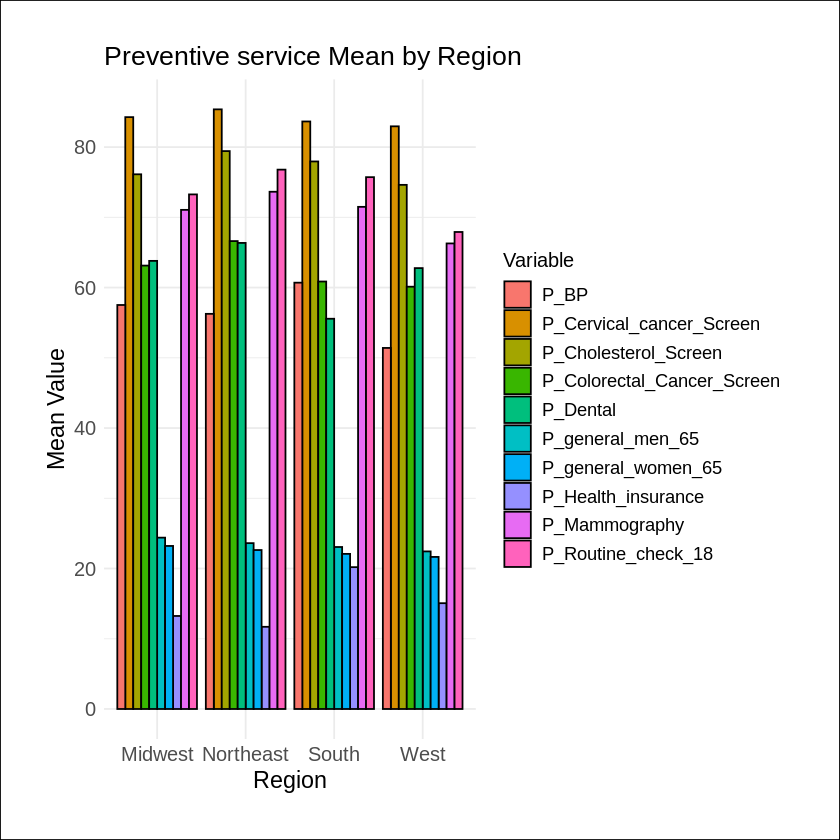

In [186]:

# Plotting using ggplot
ggplot(means_plot, aes(x = Region, y = mean_value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = "Preventive service Mean by Region",
       x = "Region",
       y = "Mean Value",
       fill = "Variable") +
  theme_minimal()+
  theme(
    # Increase plot dimensions
    plot.background = element_rect(fill = "white"),
    plot.title = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 11),
    plot.margin = margin(1, 1, 1, 1, "cm")
  ) +
  coord_cartesian(clip = "off")

**Insight-** *The above chart indicates all regions have good preventive services for cervical cancer but low rates of health insurance and poor focus on age groups above 65*

In [187]:
#Preventative Services Usage by Region
#A table and plot showing the average usage of preventative services by region.
preventative_by_region_agg <- means_plot %>%
  group_by(Region) %>%
  summarise(mean_prevention = mean(mean_value, na.rm = TRUE)) %>%
  ungroup()

preventative_by_region_agg

Region,mean_prevention
<chr>,<dbl>
Midwest,55.00296
Northeast,56.24217
South,55.12831
West,52.52357


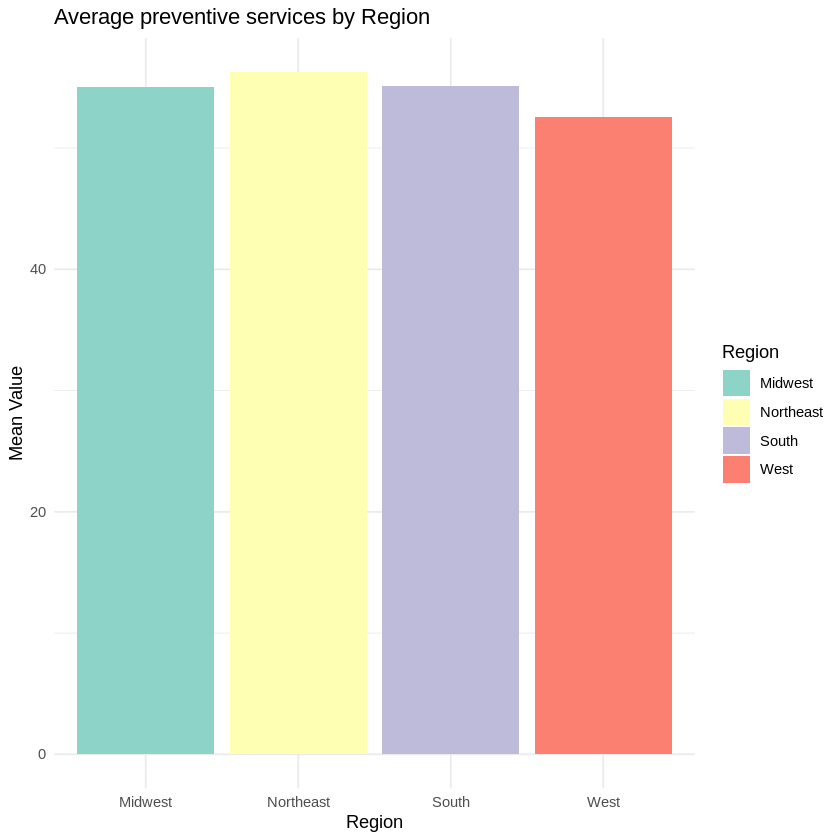

In [188]:
# Plotting using ggplot
library(ggplot2)

# Example plot with different theme and color
ggplot(preventative_by_region_agg, aes(x = Region, y = mean_prevention, fill = Region)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Average preventive services by Region",
       x = "Region",
       y = "Mean Value") +
  theme_minimal() +  # Using theme_bw() for a different theme
  scale_fill_brewer(palette = "Set3")  # Using a different color palette


**Table 2** <br>
**Unhealthy Behaviors by Division**
: A table and plot displaying the prevalence of unhealthy behaviors by division.

In [ ]:
#Unhealthy Behaviors by Division
#: A table and plot displaying the prevalence of unhealthy behaviors by division.


In [189]:
head(unhealthy_behaviors_df)

,StateAbbr,LocationName,State,Region,Division,UB_Drinking,UB_Smoking,UB_Physical,UB_Obesity,UB_Sleep
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AK,Yukon-Koyukuk,Alaska,West,Pacific,17.7,32.5,28.8,33.4,39.1
2,AK,Petersburg,Alaska,West,Pacific,19.3,19.9,20.4,27.2,33.1
3,AK,Aleutians East,Alaska,West,Pacific,14.2,21.0,26.8,27.8,38.9
4,AK,Lake and Peninsula,Alaska,West,Pacific,16.7,29.0,26.9,35.1,37.6
5,AK,Kenai Peninsula,Alaska,West,Pacific,18.5,21.4,20.3,32.0,34.4
6,AK,Denali,Alaska,West,Pacific,17.9,18.6,19.2,26.1,31.7


In [190]:
library(dplyr)
library(ggplot2)

unhealthy_behaviors_division <- unhealthy_behaviors_df %>%
  group_by(Division) %>%
  summarise(across(all_of(unhealthy_behaviors), mean)) %>%
  ungroup()

unhealthy_behaviors_division

Division,UB_Drinking,UB_Smoking,UB_Physical,UB_Obesity,UB_Sleep
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
East North Central,20.19725,22.45286,25.91693,35.26865,37.02128
East South Central,14.40632,25.20165,33.81538,38.85330,41.35110
Middle Atlantic,19.29000,20.14333,24.94200,32.44400,38.80200
Mountain,17.71210,18.49181,21.75623,30.19893,33.57438
New England,19.18955,17.27015,21.42985,28.70597,34.33284
Pacific,18.17725,17.68383,21.16527,30.35749,34.05150
South Atlantic,16.19201,21.83469,27.79609,35.15493,39.52347
West North Central,21.04806,20.53625,25.11974,35.92557,32.82718
West South Central,16.67936,21.59957,30.61213,37.63574,37.59085


In [198]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [200]:
library(ggplot2)
library(dplyr)
library(tidyr)
# Melt the data for plotting
unhealthy_by_division_melted  <- unhealthy_behaviors_division %>%
  pivot_longer(cols = -Division, names_to = "Behavior", values_to = "Prevalence")
head(unhealthy_by_division_melted)

Division,Behavior,Prevalence
<chr>,<chr>,<dbl>
East North Central,UB_Drinking,20.19725
East North Central,UB_Smoking,22.45286
East North Central,UB_Physical,25.91693
East North Central,UB_Obesity,35.26865
East North Central,UB_Sleep,37.02128
East South Central,UB_Drinking,14.40632


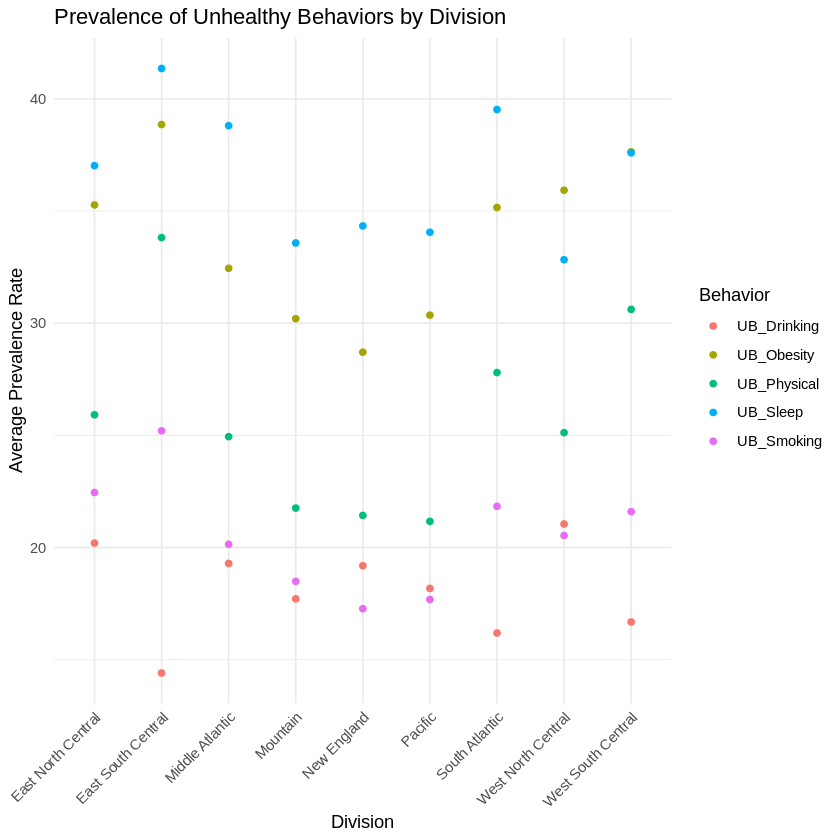

In [201]:

ggplot(unhealthy_by_division_melted, aes(x = Division, y = Prevalence, color = Behavior)) +
  geom_point() +
  labs(title = 'Prevalence of Unhealthy Behaviors by Division',
       y = 'Average Prevalence Rate',
       x = 'Division') +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


**Insight**<br>
*All the divisions have most of the individuals following poor sleeping habbits and high obesity rates followed by Physical activites*

**Table 3** <br>
**Health Outcomes by Region**
: A table and a plot that summarize the health outcomes by Region.

In [202]:
health_outcomes_region <- health_outcomes_df %>%
  group_by(Region) %>%
  summarise(across(all_of(health_outcomes), mean)) %>%
  ungroup()

health_outcomes_region

Region,HO_Teeth_lost,HO_Arthritis,HO_Cancer,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,HO_Diabetes,HO_BP,HO_Cholesterol,HO_Mental_Health,HO_Physical_Health,HO_Stroke
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midwest,15.39848,25.52009,6.503318,2.667678,7.189100,6.412227,9.569100,9.642464,30.15583,29.18701,14.06398,12.32303,3.087393
Northeast,15.22949,25.05069,6.453917,2.586175,6.808295,5.993088,10.524885,9.229954,28.51567,28.77327,14.38065,12.12673,2.884332
South,20.01793,27.59993,6.308650,3.110619,8.729536,7.492405,10.159142,12.380520,35.96990,31.82405,16.33720,15.01322,3.727567
West,15.28080,24.30179,6.329688,2.818304,6.436384,6.180580,9.925893,9.662277,28.07567,27.78036,14.04933,13.07344,3.147768


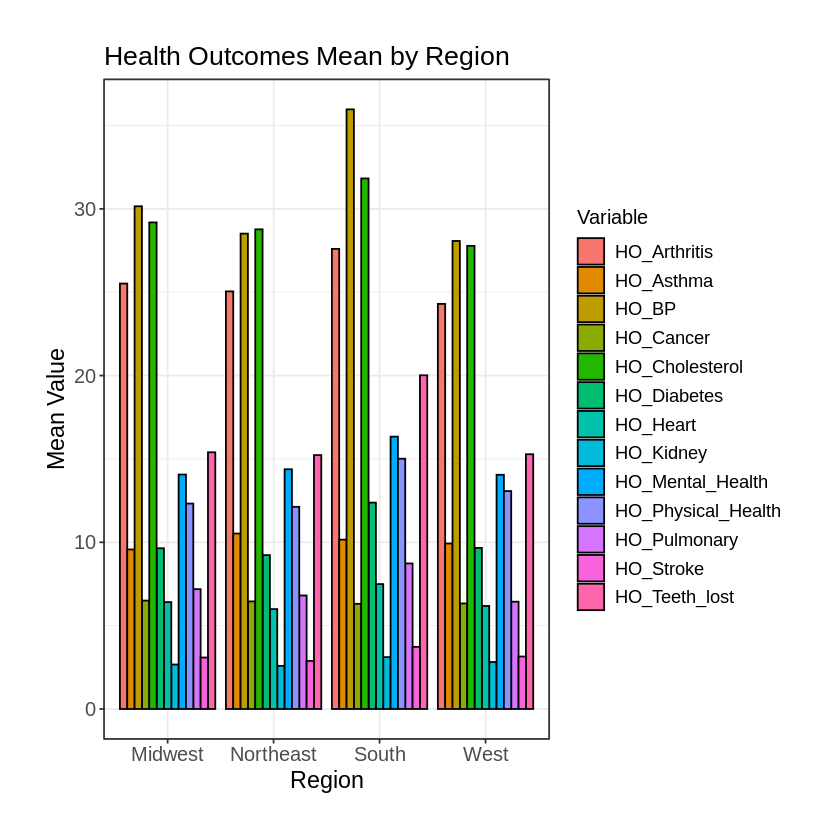

In [203]:
# Reshaping the data for plotting
means_plot_1 <- tidyr::gather(health_outcomes_region, key = "variable", value = "mean_value", -Region)

# Plotting using ggplot
ggplot(means_plot_1, aes(x = Region, y = mean_value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = "Health Outcomes Mean by Region",
       x = "Region",
       y = "Mean Value",
       fill = "Variable") +
  theme_bw()+
  theme(
    # Increase plot dimensions
    plot.background = element_rect(fill = "white"),
    plot.title = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 11),
    plot.margin = margin(1, 1, 1, 1, "cm")
  ) +
  coord_cartesian(clip = "off")

**Insight** <br>
Top 3 Health outcome in most of the regions is Blood Pressure, Cholestrol and Arthiritis with South having higest number of individuals impacted and west having lowest number of individuals impacted

**Table 4**
Correlation Analysis

In [204]:
# Select numeric columns
numeric_data <- df[, sapply(df, is.numeric)]
head(numeric_data)

,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,9.3,13.1,⋯,28.8,33.4,14.6,17.8,19.6,39.1,5.3,49.8,54.2,70.5
2,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,5.9,9.3,⋯,20.4,27.2,20.5,22.0,11.8,33.1,2.9,48.3,67.0,67.4
3,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,7.5,7.8,⋯,26.8,27.8,16.0,18.6,13.4,38.9,3.9,52.9,56.8,69.5
4,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,8.8,12.4,⋯,26.9,35.1,15.9,18.4,18.3,37.6,4.9,50.6,57.0,70.6
5,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,6.1,9.5,⋯,20.3,32.0,16.2,21.0,13.1,34.4,3.1,47.5,61.7,67.7
6,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,6.2,9.1,⋯,19.2,26.1,19.7,22.7,11.5,31.7,3.0,49.2,65.8,68.5


In [205]:
# Calculate the correlation matrix for numeric variables only
correlation_matrix <- cor(numeric_data)
correlation_matrix

,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
HO_Teeth_lost,1.00000000,0.75759846,-0.61419004,-0.08947836,-0.54594338,-0.267052021,0.8420753,0.9043493,0.94212455,0.74804575,⋯,0.87090801,0.6614949,-0.334921998,-0.3999344,0.9301972,0.69567693,0.8998866,0.607219999,-0.8713344,0.297369512
HO_Arthritis,0.75759846,1.00000000,-0.52363241,0.25923838,-0.22714143,-0.105407749,0.5174493,0.8811907,0.77097671,0.78045676,⋯,0.67927992,0.5634840,0.041123088,-0.1185984,0.7891989,0.71240597,0.6252228,0.575643811,-0.6048440,0.405425484
UB_Drinking,-0.61419004,-0.52363241,1.00000000,0.29072565,0.29096286,-0.053302364,-0.6002472,-0.5629962,-0.56754482,-0.52875304,⋯,-0.56599545,-0.3234388,0.152088353,0.1849675,-0.6453752,-0.64425436,-0.5865393,-0.476618535,0.5985914,-0.316746746
HO_Cancer,-0.08947836,0.25923838,0.29072565,1.00000000,0.24736704,-0.233782348,-0.4186150,0.1075607,-0.07617017,0.19378913,⋯,-0.23922860,-0.1175167,0.430319899,0.3324208,-0.1332677,-0.16296051,-0.2505856,-0.110861416,0.3292170,-0.024160388
P_Cervical_cancer_Screen,-0.54594338,-0.22714143,0.29096286,0.24736704,1.00000000,0.491140937,-0.5476872,-0.4298432,-0.57941328,-0.26481031,⋯,-0.47818477,-0.3565925,0.489518702,0.5389670,-0.5803875,-0.19996237,-0.4745462,0.032390909,0.6428725,0.371145659
P_Cholesterol_Screen,-0.26705202,-0.10540775,-0.05330236,-0.23378235,0.49114094,1.000000000,-0.1061940,-0.1342817,-0.22071115,-0.11491521,⋯,-0.05540838,-0.1748554,0.133763606,0.1066893,-0.1818665,0.20118385,-0.1447588,0.243479128,0.1764966,0.491212290
HO_Kidney,0.84207530,0.51744929,-0.60024717,-0.41861496,-0.54768721,-0.106193971,1.0000000,0.6759694,0.84371590,0.62460109,⋯,0.78066169,0.6253642,-0.496671963,-0.4962684,0.8604509,0.62087735,0.9566496,0.543063845,-0.8328390,0.254896535
HO_Pulmonary,0.90434935,0.88119070,-0.56299617,0.10756070,-0.42984315,-0.134281655,0.6759694,1.0000000,0.91759465,0.76812431,⋯,0.82754146,0.6099378,-0.153325286,-0.2675117,0.9052980,0.78070172,0.7568901,0.602838824,-0.7668329,0.400638339
HO_Heart,0.94212455,0.77097671,-0.56754482,-0.07617017,-0.57941328,-0.220711149,0.8437159,0.9175947,1.00000000,0.70859279,⋯,0.87406069,0.6938840,-0.317436596,-0.3949195,0.9478099,0.71564981,0.8713173,0.593563956,-0.8566114,0.296779961
HO_Asthma,0.74804575,0.78045676,-0.52875304,0.19378913,-0.26481031,-0.114915207,0.6246011,0.7681243,0.70859279,1.00000000,⋯,0.54188519,0.4248512,-0.167061870,-0.2524412,0.7847860,0.64222902,0.6943632,0.382921715,-0.5362328,0.324494341


In [206]:
# Plotting the correlation heatmap using ggplot2
library(ggplot2)
library(reshape2)

# Reshape the correlation matrix for plotting
correlation_melted <- melt(correlation_matrix)

correlation_melted


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




Var1,Var2,value
<fct>,<fct>,<dbl>
HO_Teeth_lost,HO_Teeth_lost,1.00000000
HO_Arthritis,HO_Teeth_lost,0.75759846
UB_Drinking,HO_Teeth_lost,-0.61419004
HO_Cancer,HO_Teeth_lost,-0.08947836
P_Cervical_cancer_Screen,HO_Teeth_lost,-0.54594338
P_Cholesterol_Screen,HO_Teeth_lost,-0.26705202
HO_Kidney,HO_Teeth_lost,0.84207530
HO_Pulmonary,HO_Teeth_lost,0.90434935
HO_Heart,HO_Teeth_lost,0.94212455


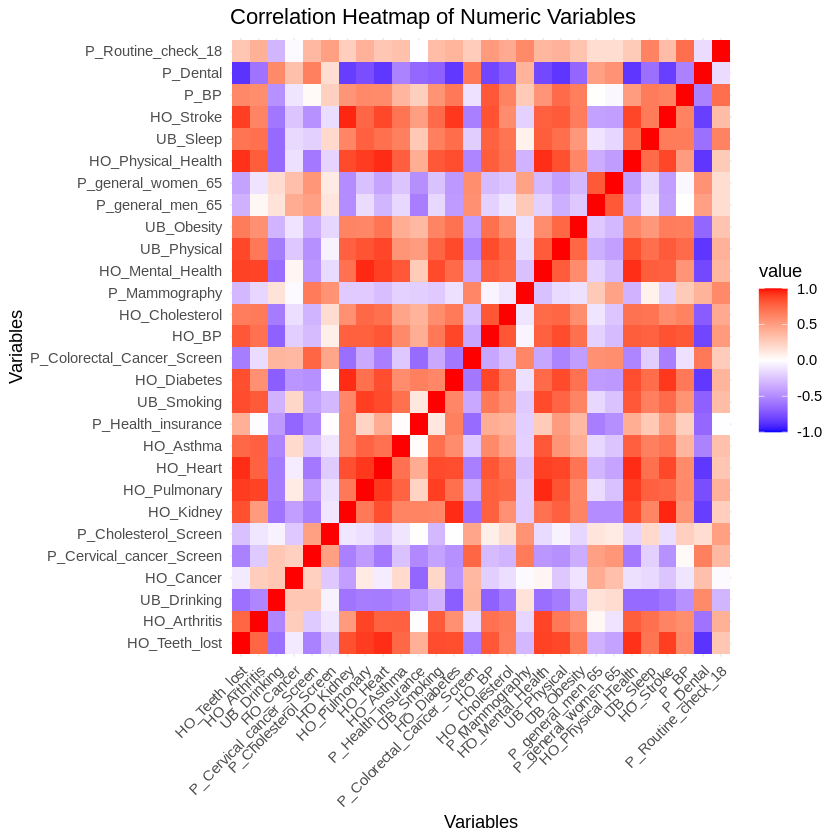

In [207]:
# Create the heatmap
ggplot(correlation_melted, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-1, 1)) +
  labs(title = "Correlation Heatmap of Numeric Variables",
       x = "Variables",
       y = "Variables") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))


In [208]:
correlation_matrix <- cor(numeric_data)
correlation_matrix[lower.tri(correlation_matrix)] <- NA
cor_table<-na.omit(data.frame(as.table(correlation_matrix)))
head(cor_table)

,Var1,Var2,Freq
,<fct>,<fct>,<dbl>
1,HO_Teeth_lost,HO_Teeth_lost,1.0000000
29,HO_Teeth_lost,HO_Arthritis,0.7575985
30,HO_Arthritis,HO_Arthritis,1.0000000
57,HO_Teeth_lost,UB_Drinking,-0.6141900
58,HO_Arthritis,UB_Drinking,-0.5236324
59,UB_Drinking,UB_Drinking,1.0000000


In [209]:
library(tidyr)


In [210]:
# Filter the dataset to keep rows where Value is greater than 20
Strong_Relationship <- cor_table %>%
  filter(abs(Freq) >= 0.9) %>%
  filter(Freq != 1)

Strong_Relationship

Var1,Var2,Freq
<fct>,<fct>,<dbl>
HO_Teeth_lost,HO_Pulmonary,0.9043493
HO_Teeth_lost,HO_Heart,0.9421245
HO_Pulmonary,HO_Heart,0.9175947
HO_Kidney,HO_Diabetes,0.9462421
HO_Pulmonary,HO_Mental_Health,0.9526729
HO_Teeth_lost,HO_Physical_Health,0.9301972
HO_Pulmonary,HO_Physical_Health,0.9052980
HO_Heart,HO_Physical_Health,0.9478099
HO_Mental_Health,HO_Physical_Health,0.9388528


From the table of health outcomes and their correlations, several insights can be highlighted:

1. **Strong Associations:** There are strong associations between various health outcomes. For instance, 'Teeth Lost' is strongly related to 'Pulmonary' (0.904) and 'Heart' (0.942) issues. Similarly, 'Pulmonary' and 'Heart' have a strong correlation (0.918), indicating potential interconnectedness between these health concerns.

2. **Interrelated Health Conditions:** The correlations suggest potential interrelatedness among different health conditions. For example, 'Kidney' issues show a high correlation with 'Diabetes' (0.946) and 'Stroke' (0.957). This could imply common risk factors or pathways that link these conditions.

3. **Comprehensive Health Impact:** Observing high correlations between various aspects of health like 'Mental Health,' 'Physical Health,' and other specific health conditions suggests a comprehensive impact on overall health. For instance, 'Mental Health' and 'Physical Health' have a strong correlation (0.939), emphasizing the holistic nature of health outcomes.

4. **Potential Predictive Relationships:** The high correlations may indicate predictive relationships between certain health outcomes. For example, the strong correlation between 'Diabetes' and 'Stroke' (0.918) might suggest a predictive relationship, where the presence of one condition might increase the likelihood of the other.

5. **Implications for Intervention:** Understanding these correlations can guide interventions and healthcare strategies. Focusing on addressing or managing interconnected health conditions together might yield more effective outcomes in managing overall health and reducing risks associated with correlated conditions.

Overall, these correlations indicate a complex web of relationships between different health outcomes, highlighting the need for a comprehensive and interconnected approach to healthcare and interventions.

**Table 5** <br>
Focussing on Diabetes to understand its relation with <br> - different health outcomes to identify comorbidity,<br> - preventive measures that negatively impact diabetes, <br> - also unhealthy behaviour that leads to Diabetes

In [211]:
# Filter the dataset to keep rows where Value is greater than 20
Diabetes_Relationship <- cor_table %>%
  filter(Var1 == "HO_Diabetes" | Var2 == "HO_Diabetes") %>%
  filter(Freq != 1) %>%
  filter(abs(Freq) >= 0.7)

Diabetes_Relationship

Var1,Var2,Freq
<fct>,<fct>,<dbl>
HO_Teeth_lost,HO_Diabetes,0.8458489
HO_Kidney,HO_Diabetes,0.9462421
HO_Pulmonary,HO_Diabetes,0.7152847
HO_Heart,HO_Diabetes,0.8481488
HO_Diabetes,HO_BP,0.8740105
HO_Diabetes,HO_Mental_Health,0.7359623
HO_Diabetes,UB_Physical,0.8574125
HO_Diabetes,UB_Obesity,0.7033810
HO_Diabetes,HO_Physical_Health,0.8471282


In [212]:
library(dplyr)

unhealthy_behaviors_for_Diabetes <- Diabetes_Relationship %>%
  filter(grepl("^UB_", Var1) | grepl("^UB_", Var2) )
unhealthy_behaviors_for_Diabetes

Var1,Var2,Freq
<fct>,<fct>,<dbl>
HO_Diabetes,UB_Physical,0.8574125
HO_Diabetes,UB_Obesity,0.7033810
HO_Diabetes,UB_Sleep,0.7292188


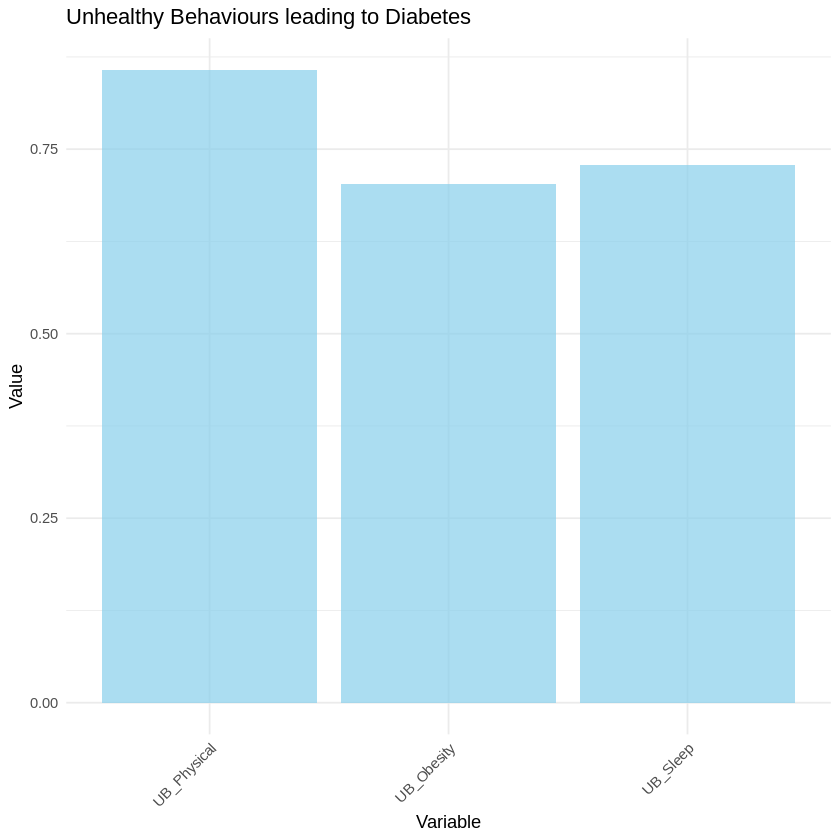

In [213]:
library(ggplot2)

# Create a bar chart of values
ggplot(unhealthy_behaviors_for_Diabetes, aes(x = Var2, y = Freq,)) +
  geom_bar(stat = "identity", fill = "skyblue", alpha = 0.7) +  # Bar chart with skyblue color
  labs(title = "Unhealthy Behaviours leading to Diabetes", x = "Variable", y = "Value") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability


In [214]:
df_filtered=df[,c("HO_Diabetes","UB_Drinking","UB_Smoking","UB_Physical","UB_Obesity","UB_Sleep","Region")]
Diabetes_Unhealthy_Behaviour <- df_filtered %>%
  group_by(Region) %>%
  summarise_all(mean) %>%
  ungroup()

Diabetes_Unhealthy_Behaviour

Region,HO_Diabetes,UB_Drinking,UB_Smoking,UB_Physical,UB_Obesity,UB_Sleep
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Midwest,9.642464,20.69564,21.33014,25.44995,35.65346,34.56445
Northeast,9.229954,19.25899,19.25622,23.85760,31.28986,37.42212
South,12.380520,15.89599,22.61885,30.26765,36.92159,39.35253
West,9.662277,17.88549,18.19063,21.53594,30.25804,33.75223


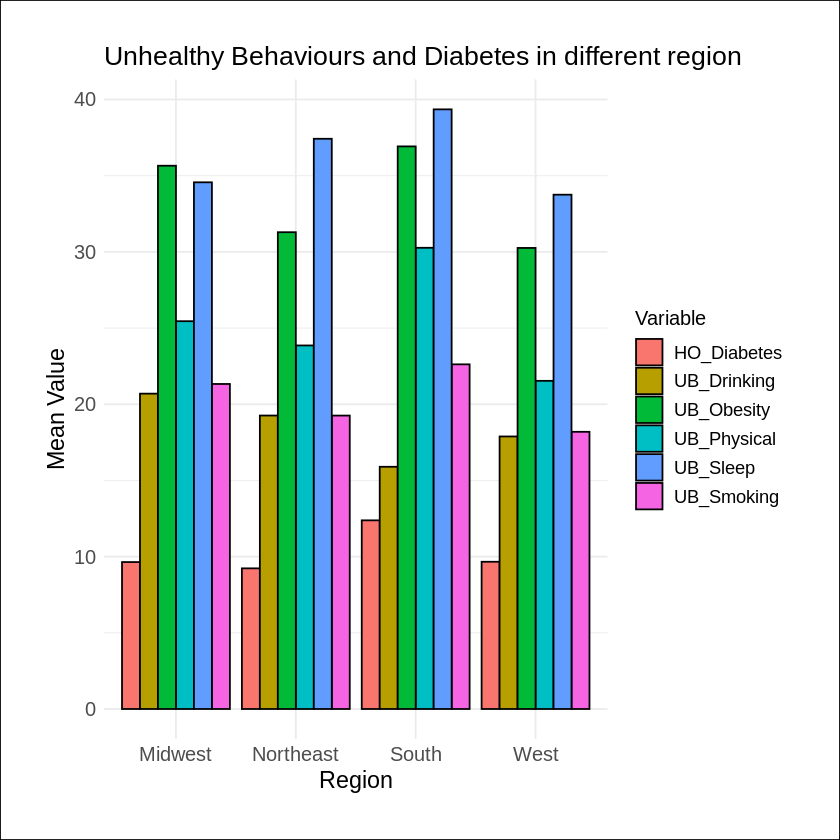

In [215]:
# Reshaping the data for plotting
means_plot <- tidyr::gather(Diabetes_Unhealthy_Behaviour, key = "variable", value = "mean_value", -Region)

# Plotting using ggplot
ggplot(means_plot, aes(x = Region, y = mean_value, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge", color = "black") +
  labs(title = "Unhealthy Behaviours and Diabetes in different region",
       x = "Region",
       y = "Mean Value",
       fill = "Variable") +
  theme_minimal()+
  theme(
    # Increase plot dimensions
    plot.background = element_rect(fill = "white"),
    plot.title = element_text(size = 16),
    axis.title = element_text(size = 14),
    axis.text = element_text(size = 12),
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 11),
    plot.margin = margin(1, 1, 1, 1, "cm")
  ) +
  coord_cartesian(clip = "off")

**Insight** <dr>
*The insight reveals a direct link: when unhealthy behavior varies proportionally across regions, the prevalence of diabetes also shows a similar proportional variation across the same regions.*

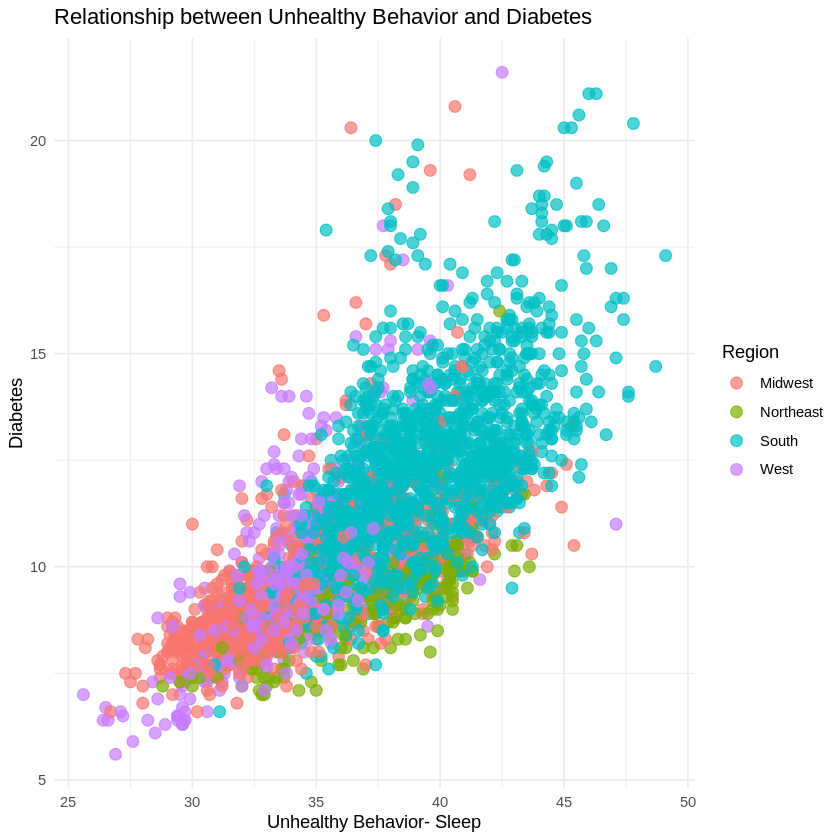

In [216]:
# Scatter plot
ggplot(df_filtered, aes(x = UB_Sleep, y =HO_Diabetes , color = Region)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Relationship between Unhealthy Behavior and Diabetes",
       x = "Unhealthy Behavior- Sleep",
       y = "Diabetes") +
  theme_minimal()

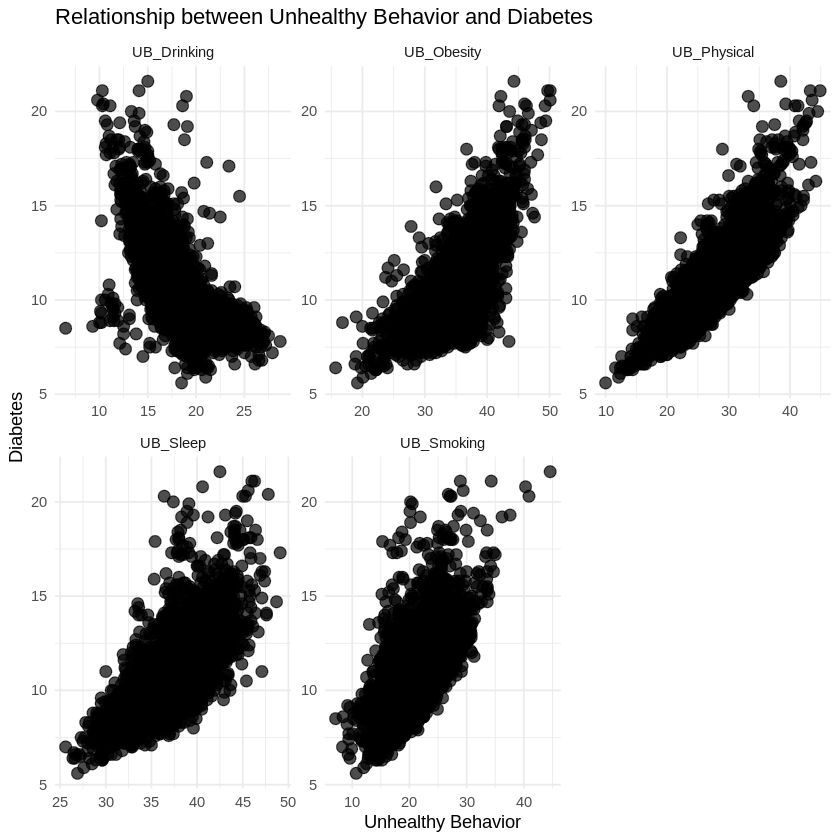

In [217]:
library(ggplot2)
library(dplyr)


ggplot(gather(df_filtered, key = "Unhealthy_Behavior", value = "Value", -HO_Diabetes, -Region),
       aes(x = Value, y = HO_Diabetes)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Relationship between Unhealthy Behavior and Diabetes",
       x = "Unhealthy Behavior",
       y = "Diabetes") +
  facet_wrap(~ Unhealthy_Behavior, scales = "free") +
  theme_minimal()

##**Insights** <dr>
**Factors Elevating Diabetes Risk:**
High obesity, lack of exercise, poor sleep routines, and smoking habits exhibit a positive relationship with a higher likelihood of diabetes among individuals. <dr>

**Surprising Impact of Drinking:**
Contrary to expectations, individuals who consume alcohol showcase a lower likelihood of diabetes, displaying a negative relationship. <dr>

These observations underline the significant impact of lifestyle factors such as obesity, exercise habits, sleep routines, smoking, and alcohol consumption on the probability of developing diabetes.

In [218]:
df_filtered2=df[,c("HO_Diabetes","P_Cervical_cancer_Screen","P_Cholesterol_Screen","P_Health_insurance","P_Colorectal_Cancer_Screen","P_Mammography","P_general_men_65","P_general_women_65","P_BP","P_Dental","P_Routine_check_18","Region")]
Diabetes_PREVENTION <- df_filtered2 %>%
  group_by(Region) %>%
  summarise_all(mean) %>%
  ungroup()


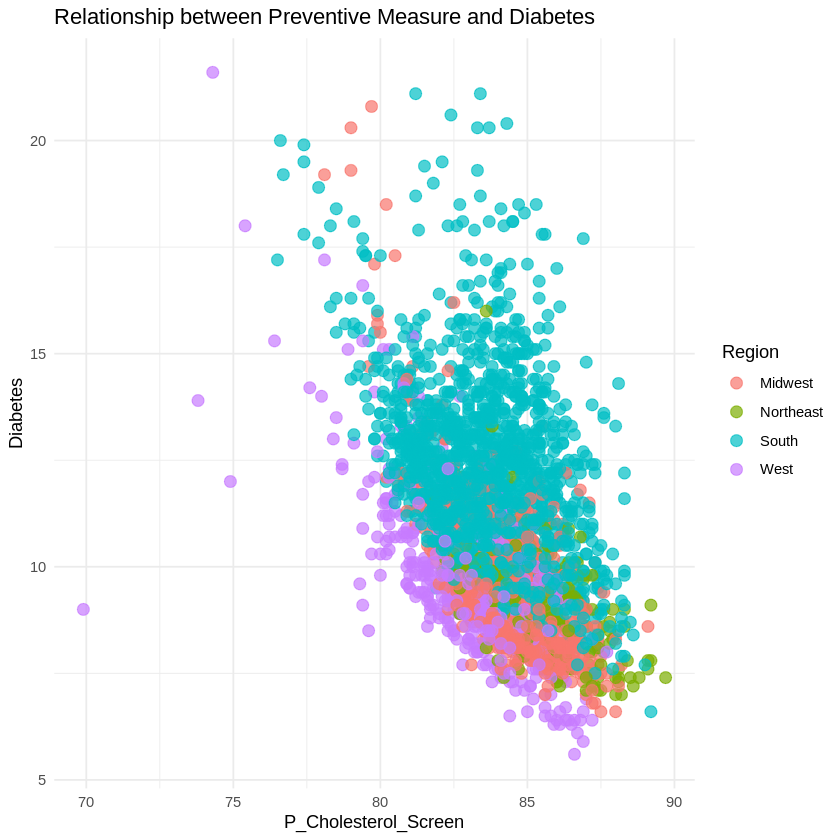

In [219]:
# Scatter plot
ggplot(df_filtered2, aes(x = P_Cervical_cancer_Screen, y =HO_Diabetes , color = Region)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Relationship between Preventive Measure and Diabetes",
       x = "P_Cholesterol_Screen",
       y = "Diabetes") +
  theme_minimal()

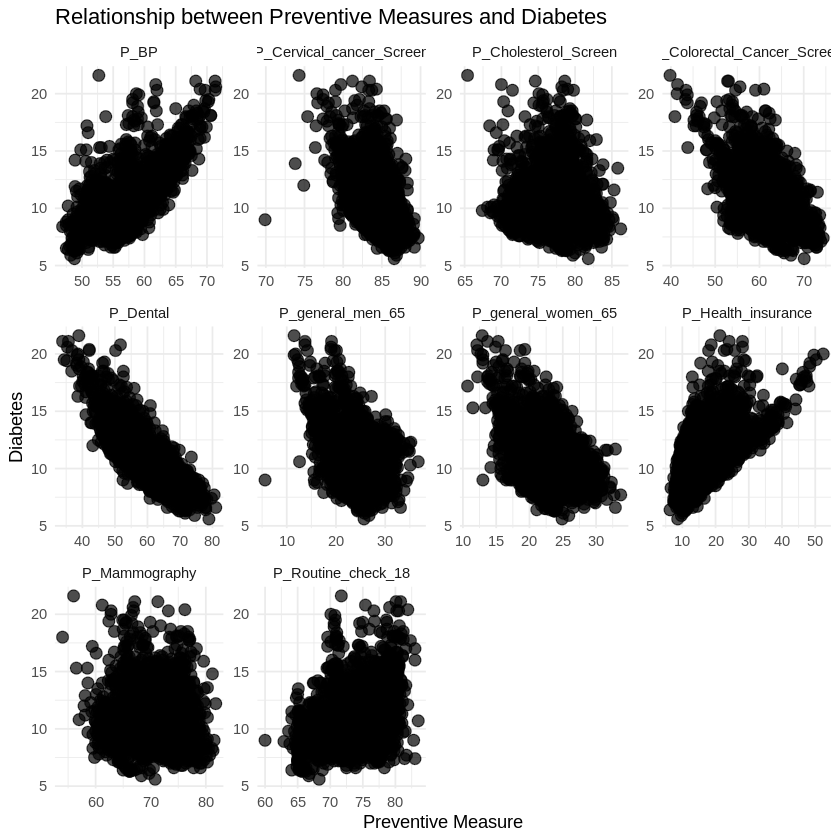

In [220]:
library(ggplot2)
library(dplyr)


ggplot(gather(df_filtered2, key = "Preventive_Measure", value = "Value", -HO_Diabetes, -Region),
       aes(x = Value, y = HO_Diabetes)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(title = "Relationship between Preventive Measures and Diabetes",
       x = "Preventive Measure",
       y = "Diabetes") +
  facet_wrap(~ Preventive_Measure, scales = "free") +
  theme_minimal()

##**Insight**

**Preventive Measures and Lower Diabetes Risk:**
Individuals opting for preventive care like Flu shots, past-year PPV shots, and Colorectal cancer screenings exhibit a lower likelihood of developing diabetes. These preventive measures demonstrate a negative correlation with diabetes risk. <dr>

**Health Consciousness and Reduced Diabetes Risk:**
Individuals undergoing cholesterol and cancer screenings, along with regular dental check-ups, showcase a health-conscious behavior. Their proactive health approach appears to correlate with a reduced likelihood of diabetes, showcasing a negative relationship. <dr>

**Insurance and Medication Impact:**
Individuals lacking health insurance plans or already on blood pressure medication show a tendency to be less attentive to their health. This behavior indicates a positive relationship with an increased likelihood of developing diabetes. <dr>

Overall, the graph illustrates distinct correlations between various preventive measures and health-conscious behaviors, highlighting their impact on the likelihood of developing diabetes.

## **Literature Review (10 pts)**

#*Literature Review on Diagnosed Diabetes Among Adults Aged ≥18 Years*

##*Introduction*
Diabetes, a chronic metabolic disorder characterized by elevated blood glucose levels, has become a global health concern with a growing prevalence among adults aged ≥18 years. This literature review delves into the current trends, preventability, demographic impact, availability of new medications, and the effect of the COVID-19 pandemic on diabetes incidence.

##1.	Current Trends</br>

•	The prevalence of diagnosed diabetes has been steadily increasing worldwide, reaching an estimated 537 million adults in 2021 [1]. This alarming trend is driven by factors such as urbanization, aging populations, and unhealthy lifestyles characterized by physical inactivity and a diet high in processed foods.
•	While the incidence of diagnosed diabetes has been declining in some developed countries, it remains high in many developing nations [2]. This disparity reflects unequal access to healthcare, education, and resources for diabetes prevention and management.</br>

##2.	Demographic Impact</br>

•	Diabetes disproportionately affects certain demographic groups, including older adults, individuals with obesity, and those from certain racial and ethnic backgrounds [3]. Older adults are more likely to develop type 2 diabetes due to age-related changes in insulin sensitivity and glucose metabolism. Obesity, a major risk factor for type 2 diabetes, has become increasingly prevalent worldwide, contributing to the rising diabetes burden. Additionally, certain racial and ethnic groups, such as African Americans, Hispanics, and Native Americans, are at higher risk for developing diabetes due to genetic and socioeconomic factors.</br>


##3.	Preventability</br>

•	Type 2 diabetes is largely preventable through lifestyle modifications, including maintaining a healthy weight, engaging in regular physical activity, and adopting a healthy diet [4]. These lifestyle changes can improve insulin sensitivity and glucose control, reducing the risk of developing type 2 diabetes.</br>

•	Early detection of diabetes through screening and timely intervention is crucial for delaying or preventing the onset of complications associated with the condition [5]. Screening asymptomatic adults for diabetes is recommended by the American Diabetes Association (ADA) and other health organizations.</br>


##4.	Availability of New Medications</br>

Advances in medical research have led to the development of new medications that offer promising treatment options for people with diabetes. Glucagon-like peptide-1 (GLP-1) agonists have demonstrated efficacy in improving glycemic control and reducing the risk of cardiovascular events in people with type 2 diabetes [6]. Sodium-glucose cotransporter-2 (SGLT2) inhibitors are another emerging class of medications that have shown effectiveness in lowering blood glucose levels and reducing the risk of heart failure and kidney disease in patients with type 2 diabetes [7].</br>


##5.	Effect of the COVID-19 Pandemic</br>

The COVID-19 pandemic has had a complex impact on diabetes incidence and management. Disruptions in healthcare access, delays in seeking medical care, and increased stress levels associated with the pandemic may have contributed to an initial surge in diabetes diagnoses [8].
The long-term impact of the pandemic on diabetes incidence remains to be fully understood. However, some studies suggest that the pandemic may have led to an increase in the number of individuals with undiagnosed or poorly controlled diabetes [9].</br>


##6.	Global Concern</br>

The rising prevalence of diabetes among adults aged ≥18 years is a global concern that requires a multi-pronged approach to address [10]. This approach should include prevention strategies, early detection and diagnosis programs, effective management of diabetes through lifestyle modifications and medications, and international collaboration to share knowledge and resources.</br>


##Works Cited</br>

1.	IDF Diabetes Atlas, 10th Edition (2021).</br>

2.	National Diabetes Statistics Report, 2022 (Centers for Disease Control and Prevention).</br>

3.	Disparities in Diabetes, National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK).</br>

4.	Preventing Type 2 Diabetes, American Diabetes Association (ADA).</br>

5.	Early Detection and Diagnosis of Diabetes, ADA.</br>

6.	Glucagon-Like Peptide-1 (GLP-1) Agonists, ADA.</br>

7.	Sodium-Glucose Cotransporter-2 (SGLT2) Inhibitors, ADA.</br>

8.	Impact of COVID-19 on Diabetes, ADA.</br>

9.	Long-Term Impact of COVID-19 on Diabetes Incidence, Centers for Disease Control and Prevention (CDC).</br>

10.	Rising Prevalence of Diabetes Among Adults Aged ≥18 Years: A Global Concern (World Health Organization, WHO).</br>




##**Hypothesis Testing (20 pts)**
Conceptualize and design a) one sample and b) two-sample hypothesis test. Compute by hand like we do in class (with a graph of the test statistic and critical value on a graph), write LaTeX formulas for the test statistic, calculate the p-value and say what the results of the test mean in plain English. 10 pts for each test.


**One Sample Test** <br> If the prevalence of diagnosed diabetes in the West region is significantly lower than the national average.<br> The null hypothesis **(H0)** is that prevalence of diagnosed diabetes in West region is more than the national average,<br> while the alternative hypothesis **(H1)** is that prevalence of diagnosed diabetes is less in West Region than national average

In [221]:
# Load required libraries
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)

# Calculate the national average of diagnosed diabetes
national_average <- mean(df$HO_Diabetes, na.rm = TRUE)

# Extract the West region's diabetes prevalence
diabetes_west <- df %>%
  filter(Region == 'West') %>%
  pull(HO_Diabetes)

In [222]:
head(diabetes_west)

[1] 15.1  8.8 13.9 14.1  8.8  8.8

In [223]:
national_average

[1] 10.85598

**Step 1:**State the null hypothesis and the alternate hypothesis <br>
<center> $H_0$ : $\mu \ge 10.85$ <br>
$H_1$ : $\mu$ $<$ 10.85

**Step 2:** Select the level of significance<br>
We will use $0.01$ significance level.


**Step 3:** Select the test statistic. <br>
We will use $t$ statistic

In [224]:
#Calculate the decision rule or critical value
# don't use qnorm()
df=length(diabetes_west)-1
qt(0.01, df=df)

[1] -2.334719

**Step 4:**  Formulate the decision rule.<br>
Reject $H_0$ if the value of $t$ is less than $-2.33$


**Step 5:** Make a decision and interpret the result.<br>


In [225]:
X_bar<-mean(diabetes_west, na.rm = TRUE)
X_bar

[1] 9.662277

In [226]:
# sampe std deviation = s
sd(diabetes_west)

[1] 1.9437

In [227]:
n= length(diabetes_west)
df=n-1
n
df

[1] 448

[1] 447

In [228]:
mu = 10.85
X_bar = 9.66
s = 1.94
n = 448
# Substitute in the formula:
#t = (X_bar - mu)/(s / sqrt(n))
t = (9.66 - 10.85)/ (1.94 / sqrt(448))
t

[1] -12.98327

**Decision and Interpretation:** Because $-12.98$ lies in the region to the left of the critical value of
$-2.33$, the null hypothesis($H_0$) is rejected at the $0.01$ significance level.<br>
The test results allow the claims that west has lower prevelance of Diabetes as compared to national average


In [229]:
# Calculating the p-value
# Calculate p-value for a one-tailed test
p_value <- pt(t, df = df)
p_value

[1] 3.127397e-33

**The p value is much smaller than the threshold value of 0.01 used for significance in hypothesis testing. A p-value this small suggests strong evidence against the null hypothesis and in favor of the alternative hypothesis.** </br>
 It suggests strong evidence in support of alternate hypothesis which states that prevalence of diagnosed diabetes is less in West Region than national average

Let's visualize this!

[1] "Test Statistic: -12.9832744749149"
[1] "P-value: approximately: 3.12739665160021e-33"
[1] "Critical t-value for 99% confidence: -2.33471902344746"


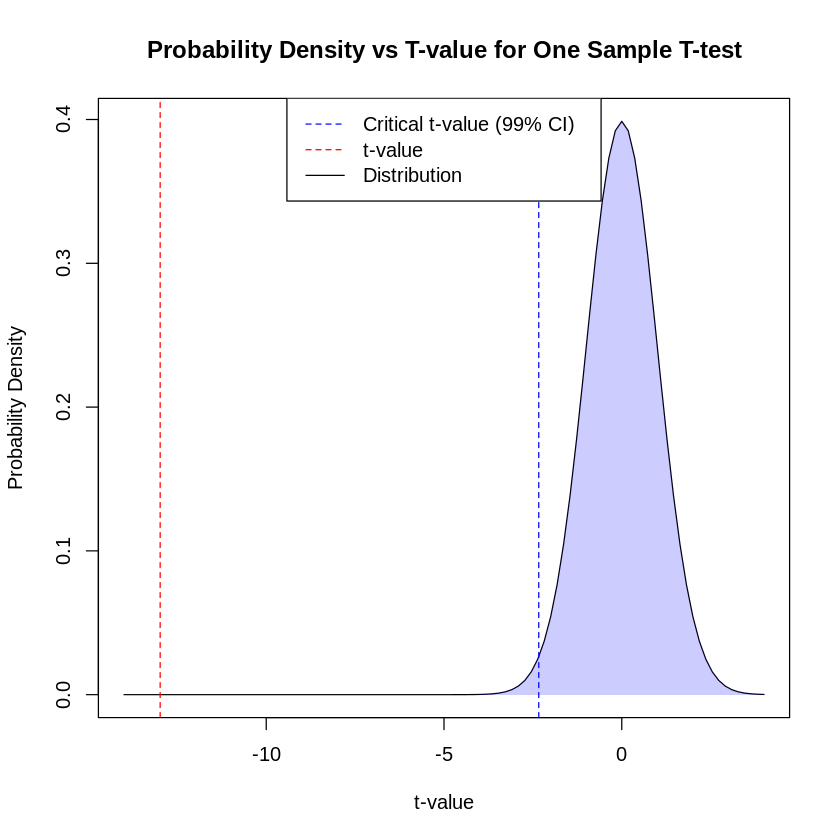

In [230]:
# Load required libraries
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)

# Calculate the critical t-value for a 95% confidence interval
critical_t_value <- qt(0.01, df=df)

# Calculate the t-value for the one-sample t-test
print(paste('Test Statistic:', t))
print(paste('P-value: approximately:', p_value))  # One-tailed test
print(paste('Critical t-value for 99% confidence:', critical_t_value))  # One-tailed test

# Plot the probability density vs t-value for one sample t-test
x <- seq(-14, 4, length.out = 100)
y <- dt(x, df = length(diabetes_west) - 1)
plot(x, y, type = "l", xlab = "t-value", ylab = "Probability Density",
     main = "Probability Density vs T-value for One Sample T-test")
light_blue_transparent <- rgb(0, 0, 1, alpha = 0.2)  # Adjust alpha for transparency (0 = fully transparent, 1 = fully opaque)
polygon(c(x, rev(x[x > t])), c(y, rep(0, sum(x > t))),
        col = light_blue_transparent, border = NA)
abline(v = t, col = "red", lty = 2)
abline(v = critical_t_value, col = "blue", lty = 2)
legend("top", legend = c("Critical t-value (99% CI)", "t-value", "Distribution"),
       col = c("blue", "red", "black"), lty = c(2, 2, 1))



**Result**: <br>
The one-sample t-test comparing the prevalence of diagnosed diabetes in the West region to the national average resulted in a t-value of approximately -12.999 and a one-tailed p-value of approximately 3.12e-33. <br>
**The negative t-value indicates that the West region's average is lower than the national average. The extremely low p-value suggests that the difference is statistically significant, and we can reject the null hypothesis in favor of the alternative hypothesis that the West region's average for prevelance of diabetes is less than the national average**. <br>
The graph above shows the probability density function for the t-distribution with the t-value marked, indicating the area under the curve to the right of the t-value, which corresponds to the p-value for the one-tailed test.

#Two Sample Test</br>
Compare the prevalence of diagnosed diabetes between the West region and another region, say the South.<br> The null hypothesis **(H0)** will be that there is no difference between the two regions, <br> while the alternative hypothesis **(H1)** will be that there is a significant difference.

**Step 1:** State the null hypothesis and the alternate hypothesis
<center> $H_0$:$\mu_w$ = $\mu_s$<br>
$H_1$:$\mu_w$ $\ne \mu_s$</center>


In [232]:
library(dplyr)

df <- merge(data, census_data, by.x = "StateAbbr", by.y = "State.Code", all.x = TRUE)
head(df)

,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,⋯,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18,State,Region,Division
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AK,Yukon-Koyukuk,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,⋯,17.8,19.6,39.1,5.3,49.8,54.2,70.5,Alaska,West,Pacific
2,AK,Petersburg,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,⋯,22.0,11.8,33.1,2.9,48.3,67.0,67.4,Alaska,West,Pacific
3,AK,Aleutians East,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,⋯,18.6,13.4,38.9,3.9,52.9,56.8,69.5,Alaska,West,Pacific
4,AK,Lake and Peninsula,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,⋯,18.4,18.3,37.6,4.9,50.6,57.0,70.6,Alaska,West,Pacific
5,AK,Kenai Peninsula,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,⋯,21.0,13.1,34.4,3.1,47.5,61.7,67.7,Alaska,West,Pacific
6,AK,Denali,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,⋯,22.7,11.5,31.7,3.0,49.2,65.8,68.5,Alaska,West,Pacific


In [233]:
# Extract the South region's diabetes prevalence
diabetes_south <- df[df$Region == 'South', 'HO_Diabetes']
diabetes_west <- df[df$Region == 'West', 'HO_Diabetes']

The required assumptions are:<br>
1. The observations in the West sample are independent of the observations in the South sample.
2. The two populations follow the normal distribution.
3. The two populations have equal standard deviations.



**Step 2:** Select the level of significance <br>
The level of significance is $0.10$

**Step 3:** Select the test statistic<br>
We will be using $t$ statistic

**Step 4:** Formulate the decision rule and interpret the results<br>


In [234]:
# Calculate the critical value at 0.10 significance level
alpha = 0.10
nw = length(diabetes_west)
ns = length(diabetes_south)
df = nw + ns - 2 #df = n1+n2 -2
t.half.alpha = qt(1-alpha/2, df=df)
c(-t.half.alpha, t.half.alpha)

[1] -1.64567  1.64567

**Decision rule:** If the computed $t$ value falls between $-1.645$ and $1.645$, do not reject the null hypothesis ($H_0$), else reject $H_0$

#### We use three steps to compute the value of $t$:<br>


In [235]:
mean_west <-mean(diabetes_west, na.rm = TRUE)
mean_south <-mean(diabetes_south, na.rm = TRUE)
sd_west<-sd(diabetes_west)
sd_south<-sd(diabetes_west)
print(paste("mean_west: ",mean_west))
print(paste("mean_south: ",mean_south))
print(paste("sd_west: ",sd_west))
print(paste("sd_south: ",sd_south))

[1] "mean_west:  9.66227678571429"
[1] "mean_south:  12.3805203938115"
[1] "sd_west:  1.94370001510563"
[1] "sd_south:  1.94370001510563"


##### Step 2: Pool the sample variances

In [236]:
# Sp^2= ((n1-1)s1^2 + (n2-1)s2^2)/n1+n2-2
sp_2=(((nw-1)*sd_west^2)+((ns-1)*sd_south^2))/df
sp_2

[1] 3.77797

In [237]:
# compute the t-statistic:
# t = (X_bar1-X_bar2)/sqrt(sp^2(1/n1 + 1/n2))

t = (mean_west - mean_south)/sqrt(sp_2*(1/nw + 1/ns))
t

[1] -25.81233

**Decision:** The decision is to reject the null hypothesis, because $-25.81$ falls outside in the region between $-1.64$ and $1.64$ <br>
**Interpretation of the result**: We conclude that there is difference in the mean diabetes prevelance rate between West and South Region

Let's check the $p$-value for our test statistic:<br>

In [238]:
pval = 2*pt(t,df=df)
pval

[1] 6.638402e-126

The $p$-value is lesser than the significance level
of $0.01$. The conclusion is to reject the null hypothesis.

[1] "T-statistic: -25.8123258758085"
[1] "P-value: 6.63840237157639e-126"


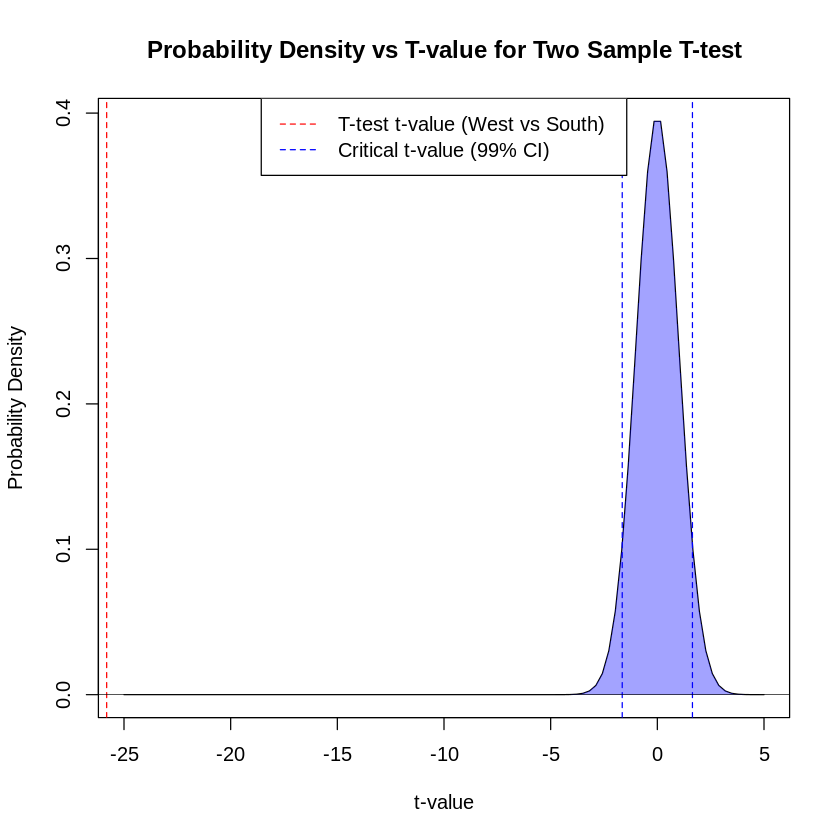

In [239]:
# Calculate the confidence interval
confidence_level <- 0.99
degrees_freedom <- df
sample_mean_diff <- mean(diabetes_west) - mean(diabetes_south)
std_err_diff <- sqrt(var(diabetes_west) / length(diabetes_west) + var(diabetes_south) / length(diabetes_south))

confidence_interval <- qt(c((1 - confidence_level) / 2, 1 - (1 - confidence_level) / 2), df = degrees_freedom) * std_err_diff + sample_mean_diff
critical_t_value <- qt(0.975, df = degrees_freedom)

# Output the t-statistic, p-value, and confidence interval
print(paste('T-statistic:', t))
print(paste('P-value:', pval))

light_blue_transparent <- rgb(0, 0, 1, alpha = 0.2)  # Adjust alpha for transparency (0 = fully transparent, 1 = fully opaque)

# Plot the probability density vs t-value for two sample t-test
x <- seq(-25, 5, length.out = 100)
y <- dt(x, df = df)
plot(x, y, type = "l", xlab = "t-value", ylab = "Probability Density",
     main = "Probability Density vs T-value for Two Sample T-test")
polygon(c(x, rev(x[x < -abs(t)])), c(y, rep(0, sum(x < -abs(t)))),
        col = light_blue_transparent, border = NA)
polygon(c(x, rev(x[x > abs(t)])), c(y, rep(0, sum(x > abs(t)))),
        col = light_blue_transparent, border = NA)
abline(v = c(-abs(t), abs(t), -t.half.alpha, t.half.alpha),
       col = c("red", "red", "blue", "blue"), lty = c(2, 2, 2, 2))
abline(h = 0, col = "black", lwd = 0.5)
legend("top", legend = c("T-test t-value (West vs South)", "Critical t-value (99% CI)"),
       col = c("red", "blue"), lty = c(2, 2))

**Result:** <br>
The two-sample t-test comparing the prevalence of diagnosed diabetes between the West region and the South region resulted in a t-statistic of approximately -25.81 and a two-tailed p-value of approximately 6.63e-126.The confidence interval for the difference in means ranges from approximately -1.64 to 1.64. <br>
**The negative t-statistic indicates that the average prevalence of diagnosed diabetes in the West region is lower than in the South region. The extremely low p-value suggests that the difference is statistically significant, and we can reject the null hypothesis in favor of the alternative hypothesis that there is a significant difference between the two regions.** <br>

The graph above shows the probability density function for the t-distribution with the t-statistic marked, indicating the areas under the curve beyond the t-statistic values, which correspond to the p-value for the two-tailed test.



#**Modeling and Error Metrics (40 pts)**
10 pts for each model and associated metrics.

I want you to fit two models (linear, logistic) with a full and reduced set of variables. Four models total. I want you to compare the model performance of the full and reduced models for each type. Do not split your data into train and test partitions. Do not use the caret() package for this project.



##**Regression (20 pts)** <br>
**PART A** <br>
●	Linear - full variables <br>
○	Use all the variables that make sense to predict your health column (don’t use the FIPS column or ID columns!) Just use the health outcomes, prevention and unhealthy behaviors data. <br>
○	Store your predictions in a vector for use later. <br>
○	Calculate AIC, RMSE, MAE, scatterplot of actual vs. predicted with nice titles/labels, and any other metrics that you want to analyze.

In [248]:
library(dplyr)

df <- merge(data, census_data, by.x = "StateAbbr", by.y = "State.Code", all.x = TRUE)
head(df)

,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,⋯,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18,State,Region,Division
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AK,Yukon-Koyukuk,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,⋯,17.8,19.6,39.1,5.3,49.8,54.2,70.5,Alaska,West,Pacific
2,AK,Petersburg,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,⋯,22.0,11.8,33.1,2.9,48.3,67.0,67.4,Alaska,West,Pacific
3,AK,Aleutians East,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,⋯,18.6,13.4,38.9,3.9,52.9,56.8,69.5,Alaska,West,Pacific
4,AK,Lake and Peninsula,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,⋯,18.4,18.3,37.6,4.9,50.6,57.0,70.6,Alaska,West,Pacific
5,AK,Kenai Peninsula,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,⋯,21.0,13.1,34.4,3.1,47.5,61.7,67.7,Alaska,West,Pacific
6,AK,Denali,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,⋯,22.7,11.5,31.7,3.0,49.2,65.8,68.5,Alaska,West,Pacific


In [249]:
colnames(df)

[1] "StateAbbr"                  "LocationName"              
 [3] "HO_Teeth_lost"              "HO_Arthritis"              
 [5] "UB_Drinking"                "HO_Cancer"                 
 [7] "P_Cervical_cancer_Screen"   "P_Cholesterol_Screen"      
 [9] "HO_Kidney"                  "HO_Pulmonary"              
[11] "HO_Heart"                   "HO_Asthma"                 
[13] "P_Health_insurance"         "UB_Smoking"                
[15] "HO_Diabetes"                "P_Colorectal_Cancer_Screen"
[17] "HO_BP"                      "HO_Cholesterol"            
[19] "P_Mammography"              "HO_Mental_Health"          
[21] "UB_Physical"                "UB_Obesity"                
[23] "P_general_men_65"           "P_general_women_65"        
[25] "HO_Physical_Health"         "UB_Sleep"                  
[27] "HO_Stroke"                  "P_BP"                      
[29] "P_Dental"                   "P_Routine_check_18"        
[31] "State"                      "Region"                    
[33] "Division"

In [250]:
numeric_cols <- sapply(df, is.numeric)
numeric_cols <- numeric_cols & names(df) != "HO_Diabetes"
X <- df[, numeric_cols]
head(X)

,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,9.3,13.1,⋯,28.8,33.4,14.6,17.8,19.6,39.1,5.3,49.8,54.2,70.5
2,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,5.9,9.3,⋯,20.4,27.2,20.5,22.0,11.8,33.1,2.9,48.3,67.0,67.4
3,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,7.5,7.8,⋯,26.8,27.8,16.0,18.6,13.4,38.9,3.9,52.9,56.8,69.5
4,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,8.8,12.4,⋯,26.9,35.1,15.9,18.4,18.3,37.6,4.9,50.6,57.0,70.6
5,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,6.1,9.5,⋯,20.3,32.0,16.2,21.0,13.1,34.4,3.1,47.5,61.7,67.7
6,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,6.2,9.1,⋯,19.2,26.1,19.7,22.7,11.5,31.7,3.0,49.2,65.8,68.5


[1] "Mean Absolute Percentage Error (MAPE): 2.60424906213251"
[1] "Mean Absolute Error (MAE): 0.27642406619273"
[1] "Root Mean Squared Error (RMSE): 0.361121273530802"
[1] "Akaike Information Criterion (AIC): 2574.09533806393"



Call:
lm(formula = y ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61134 -0.22605 -0.01653  0.20858  2.49358 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.384925   0.674292   3.537 0.000411 ***
HO_Teeth_lost               0.021856   0.006814   3.207 0.001353 ** 
HO_Arthritis                0.014434   0.006189   2.332 0.019765 *  
UB_Drinking                -0.072791   0.004512 -16.134  < 2e-16 ***
HO_Cancer                  -1.064404   0.054092 -19.678  < 2e-16 ***
P_Cervical_cancer_Screen   -0.012815   0.007521  -1.704 0.088503 .  
P_Cholesterol_Screen        0.010328   0.004941   2.090 0.036696 *  
HO_Kidney                   2.582284   0.100476  25.701  < 2e-16 ***
HO_Pulmonary               -0.002132   0.019411  -0.110 0.912550    
HO_Heart                    0.301145   0.032621   9.232  < 2e-16 ***
HO_Asthma                   0.039060   0.017948   2.176 0.029608 *  
P_Health_insuran

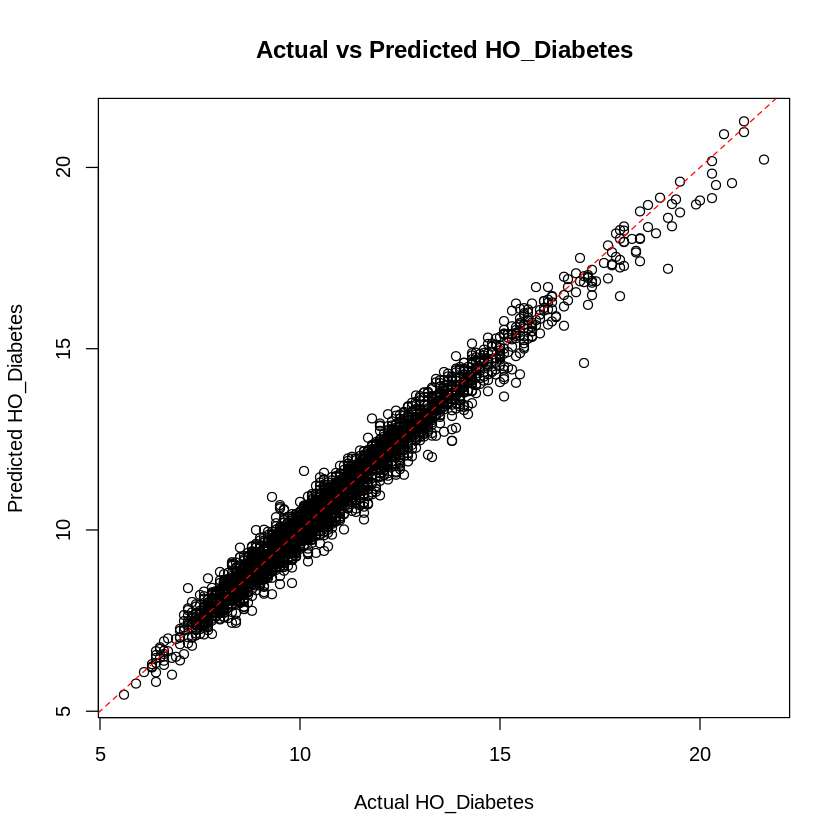

In [251]:
library(readr)
library(dplyr)
library(ggplot2)

# The target variable is 'HO_Diabetes'
y <- df$HO_Diabetes

# Split the data into training and testing sets
set.seed(42)

# Initialize the Linear Regression model
lr <- lm(y ~ ., data = X)

# Predict on the test set
y_pred <- predict(lr, newdata = X)

# Calculate metrics
mae <- mean(abs(y - y_pred))
rmse_val <- sqrt(mean((y - y_pred)^2))
aic <- AIC(lr)
# Calculate MAPE (Mean Absolute Percentage Error)
mape <- mean(abs((y - y_pred) / y)) * 100

# Print the MAPE
print(paste('Mean Absolute Percentage Error (MAPE):', mape))
print(paste('Mean Absolute Error (MAE):', mae))
print(paste('Root Mean Squared Error (RMSE):', rmse_val))
print(paste('Akaike Information Criterion (AIC):', aic))

# Scatter plot of actual vs predicted
plot(y, y_pred, main = 'Actual vs Predicted HO_Diabetes', xlab = 'Actual HO_Diabetes', ylab = 'Predicted HO_Diabetes')
abline(0, 1, col = 'red', lty = 2)

# Store predictions in a vector
predictions_vector_full_linear <- y_pred

summary(lr)

The provided statistics can offer insights into the overall performance of the base linear classification model:

- **Mean Absolute Percentage Error (MAPE):** Indicates the average percentage difference between the predicted and actual values. A MAPE of approximately 2.6% suggests that, on average, the model's predictions deviate by around 2.6% from the actual values. Lower MAPE values generally indicate better accuracy.

- **Mean Absolute Error (MAE):** Represents the average absolute difference between the predicted and actual values. An MAE of about 0.27 implies that, on average, the model's predictions are around 0.292 units off from the actual values. Lower MAE values signify better accuracy.

- **Root Mean Squared Error (RMSE):** Reflects the standard deviation of the residuals (the differences between predicted and actual values). An RMSE of approximately 0.36 suggests that, on average, the model's predictions differ by about 0.36 units from the actual values. Lower RMSE values indicate better model fit.

- **Akaike Information Criterion (AIC):** A metric used for model comparison, where lower AIC values indicate a better fit of the model to the data. The provided AIC value of 2574 suggests the model has a certain goodness of fit, but direct interpretation might require comparing it to other models with different features or approaches.

Overall, based on these statistics:
- The model shows relatively low errors (MAPE, MAE, RMSE), implying good predictive performance.
- The AIC value suggests that this model, within the specific context of the analysis, fits the data reasonably well.
- However, it's essential to compare these metrics with alternative models or benchmarks to gain a better understanding of the model's relative performance.

#*Disclamer:*</br>
  For running the liner regression with full variable set, We havee not tested the data for all the 3 important assumptions of linear regression. </br>

  1. **Independence of predictors**: - The Predictors like HO_Dental, HO_BP, P_Dental, UB_Obesity etc. are higly co-related and henced it fails this assumption so Idealy out of all the set of predictors only some should have been selected based on most significance value. Methodlogies like VIF (Variance Inflation Factor) can be used to indentify most impactful and non co-related predictors from the given set of full variables.  </br>
  2. **Linear relationship between target variables and predictors**:- This has been somewhat accounted using exploration data analysis and correlation values.</br>
  3. **Errors normally distributed**: This is also been tested actual vs and predicted graph and follows the normal distribution.  

**#Discussion/Analysis (10 pts)** <br>
The reason why I wanted you to store your predictions is so you could analyze the data by State, division or region. In addition to the results I had you calculate above, now I want you to be more specific. Be thorough and tell me something about how your model does! Is it particularly good or bad in a region? Make at least two plots and two tables that help tell your story.
<br>
Hint: I love to see boxplots of mean absolute error by region and division with nice labels and titles.


In [252]:
library(dplyr)
library(ggplot2)

# Assuming 'results' is a dataframe containing 'Actual' and 'Predicted' columns

# Add the predicted values to the test set
y <- as.data.frame(y)
y_pred <- as.data.frame(y_pred)  # Convert y_pred to a dataframe if not already
results <- cbind(y, y_pred)
names(results) <- c('Actual', 'Predicted')

head(results)

,Actual,Predicted
,<dbl>,<dbl>
1,15.1,14.156450
2,8.8,8.369775
3,13.9,12.817433
4,14.1,13.307613
5,8.8,9.055975
6,8.8,8.683166


In [253]:
head(X)

,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,9.3,13.1,⋯,28.8,33.4,14.6,17.8,19.6,39.1,5.3,49.8,54.2,70.5
2,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,5.9,9.3,⋯,20.4,27.2,20.5,22.0,11.8,33.1,2.9,48.3,67.0,67.4
3,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,7.5,7.8,⋯,26.8,27.8,16.0,18.6,13.4,38.9,3.9,52.9,56.8,69.5
4,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,8.8,12.4,⋯,26.9,35.1,15.9,18.4,18.3,37.6,4.9,50.6,57.0,70.6
5,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,6.1,9.5,⋯,20.3,32.0,16.2,21.0,13.1,34.4,3.1,47.5,61.7,67.7
6,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,6.2,9.1,⋯,19.2,26.1,19.7,22.7,11.5,31.7,3.0,49.2,65.8,68.5


In [254]:
indices <- rownames(X)
X <- df[indices, ]
head(X)

,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,⋯,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18,State,Region,Division
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,AK,Yukon-Koyukuk,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,⋯,17.8,19.6,39.1,5.3,49.8,54.2,70.5,Alaska,West,Pacific
2,AK,Petersburg,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,⋯,22.0,11.8,33.1,2.9,48.3,67.0,67.4,Alaska,West,Pacific
3,AK,Aleutians East,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,⋯,18.6,13.4,38.9,3.9,52.9,56.8,69.5,Alaska,West,Pacific
4,AK,Lake and Peninsula,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,⋯,18.4,18.3,37.6,4.9,50.6,57.0,70.6,Alaska,West,Pacific
5,AK,Kenai Peninsula,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,⋯,21.0,13.1,34.4,3.1,47.5,61.7,67.7,Alaska,West,Pacific
6,AK,Denali,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,⋯,22.7,11.5,31.7,3.0,49.2,65.8,68.5,Alaska,West,Pacific


In [255]:
# Merge with the original data to get the region and division information
results_merged <- cbind(results, X)

In [256]:
head(results_merged)

,Actual,Predicted,StateAbbr,LocationName,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,⋯,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18,State,Region,Division
,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,15.1,14.156450,AK,Yukon-Koyukuk,29.2,28.8,17.7,6.6,80.1,69.6,⋯,17.8,19.6,39.1,5.3,49.8,54.2,70.5,Alaska,West,Pacific
2,8.8,8.369775,AK,Petersburg,14.0,23.2,19.3,6.3,84.2,72.9,⋯,22.0,11.8,33.1,2.9,48.3,67.0,67.4,Alaska,West,Pacific
3,13.9,12.817433,AK,Aleutians East,23.3,21.0,14.2,5.3,73.8,71.5,⋯,18.6,13.4,38.9,3.9,52.9,56.8,69.5,Alaska,West,Pacific
4,14.1,13.307613,AK,Lake and Peninsula,27.2,27.2,16.7,6.5,79.8,70.2,⋯,18.4,18.3,37.6,4.9,50.6,57.0,70.6,Alaska,West,Pacific
5,8.8,9.055975,AK,Kenai Peninsula,14.4,26.1,18.5,6.4,82.2,72.1,⋯,21.0,13.1,34.4,3.1,47.5,61.7,67.7,Alaska,West,Pacific
6,8.8,8.683166,AK,Denali,13.8,22.7,17.9,6.4,83.3,72.8,⋯,22.7,11.5,31.7,3.0,49.2,65.8,68.5,Alaska,West,Pacific


In [257]:
# Calculate the absolute error
results_merged$Absolute_Error <- abs(results_merged$Actual - results_merged$Predicted)

# Group by region and division and calculate the mean absolute error
mean_absolute_error_by_region <- results_merged %>%
  group_by(Region) %>%
  summarise(Mean_Absolute_Error = mean(Absolute_Error))

mean_absolute_error_by_division <- results_merged %>%
  group_by(Division) %>%
  summarise(Mean_Absolute_Error = mean(Absolute_Error))


[1] "Mean absolute error by region"
# A tibble: 4 × 2
  Region    Mean_Absolute_Error
  <chr>                   <dbl>
1 Midwest                 0.264
2 Northeast               0.291
3 South                   0.258
4 West                    0.356


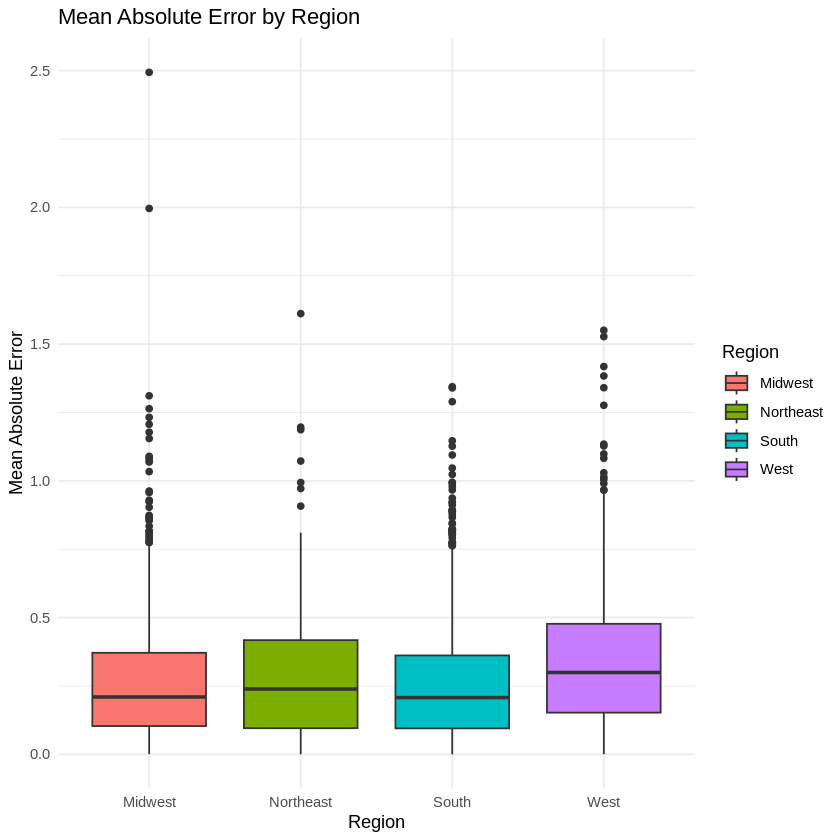

In [258]:
print("Mean absolute error by region")
print(mean_absolute_error_by_region)
# Create boxplots for mean absolute error by region and division
ggplot(results_merged, aes(x = Region, y = Absolute_Error, fill = Region))+
  geom_boxplot() +
  labs(title = "Mean Absolute Error by Region", x = "Region", y = "Mean Absolute Error") +
  theme_minimal()


##**Insight**- </br>
Error Range is lowest in South followed by Mid West region. </br>
Error range is highest in West region.</br>
Need to deep dive into this region to understand which Divison  are perfoming bad

[1] "Mean absolute error by Divison"
# A tibble: 4 × 2
  Region    Mean_Absolute_Error
  <chr>                   <dbl>
1 Midwest                 0.264
2 Northeast               0.291
3 South                   0.258
4 West                    0.356


Division,Mean_Absolute_Error
<chr>,<dbl>
East North Central,0.3015791
East South Central,0.2389508
Middle Atlantic,0.2582192
Mountain,0.3562319
New England,0.3654996
Pacific,0.3555543
South Atlantic,0.2655189
West North Central,0.2380423
West South Central,0.2634487


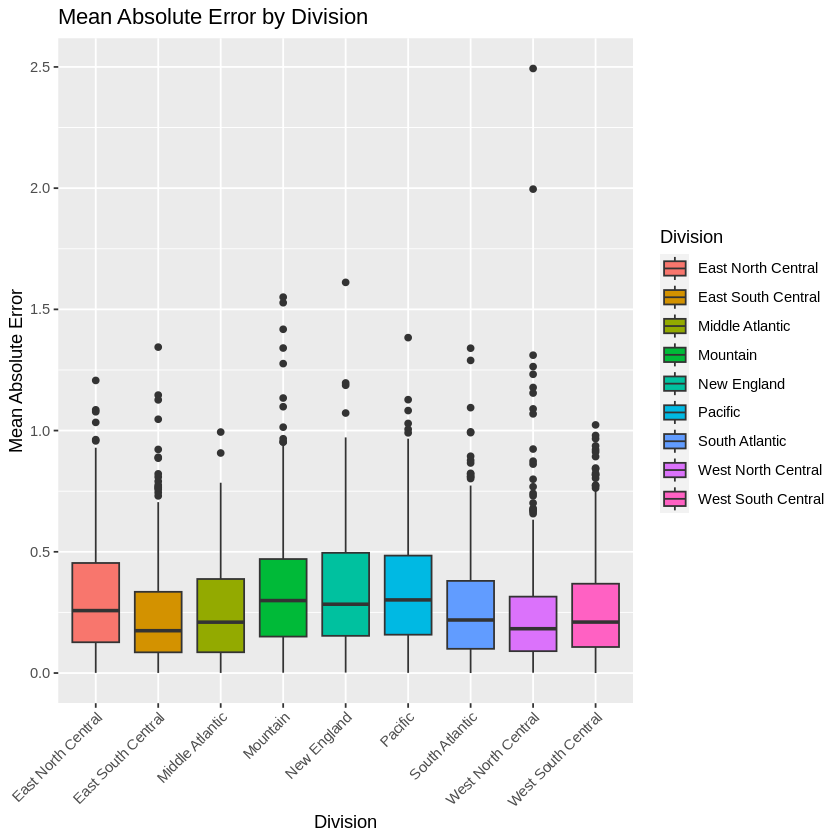

In [259]:
print("Mean absolute error by Divison")
print(mean_absolute_error_by_region)
mean_absolute_error_by_division
ggplot(results_merged, aes(x = Division, y = Absolute_Error, fill = Division)) +
  geom_boxplot() +
  labs(title = "Mean Absolute Error by Division", x = "Division", y = "Mean Absolute Error") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [260]:
#census_data[,c('Region', 'Division')].drop_duplicates()
group_by(census_data[,c('Region', 'Division')], Region, Division) %>% slice(1)

Region,Division
<chr>,<chr>
Midwest,East North Central
Midwest,West North Central
Northeast,Middle Atlantic
Northeast,New England
South,East South Central
South,South Atlantic
South,West South Central
West,Mountain
West,Pacific


##**Insight**
 **West** - Pasific has high median of error followed by Mountain. </br>
 **Northeast** - New Eng;and has higer median and range of errors than Middle Atlantic

##**Regression (20 pts)** <br>
**PART B** <br>
●	Linear - reduced variables <br>
○	Use stepwise forward, backwards regression or p-hacking <br>
○	Store your predictions in a vector for use later. <br>
○	Calculate AIC, RMSE, MAE, scatterplot of actual vs. predicted with nice titles/labels, and any other metrics that you want to analyze.

In [262]:
numeric_cols <- sapply(df, is.numeric)
numeric_cols <- numeric_cols & names(df) != "HO_Diabetes"
X <- df[, numeric_cols]
head(X)

,HO_Teeth_lost,HO_Arthritis,UB_Drinking,HO_Cancer,P_Cervical_cancer_Screen,P_Cholesterol_Screen,HO_Kidney,HO_Pulmonary,HO_Heart,HO_Asthma,⋯,UB_Physical,UB_Obesity,P_general_men_65,P_general_women_65,HO_Physical_Health,UB_Sleep,HO_Stroke,P_BP,P_Dental,P_Routine_check_18
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,29.2,28.8,17.7,6.6,80.1,69.6,4.0,10.5,9.3,13.1,⋯,28.8,33.4,14.6,17.8,19.6,39.1,5.3,49.8,54.2,70.5
2,14.0,23.2,19.3,6.3,84.2,72.9,2.5,6.2,5.9,9.3,⋯,20.4,27.2,20.5,22.0,11.8,33.1,2.9,48.3,67.0,67.4
3,23.3,21.0,14.2,5.3,73.8,71.5,3.1,6.2,7.5,7.8,⋯,26.8,27.8,16.0,18.6,13.4,38.9,3.9,52.9,56.8,69.5
4,27.2,27.2,16.7,6.5,79.8,70.2,3.7,9.7,8.8,12.4,⋯,26.9,35.1,15.9,18.4,18.3,37.6,4.9,50.6,57.0,70.6
5,14.4,26.1,18.5,6.4,82.2,72.1,2.6,6.7,6.1,9.5,⋯,20.3,32.0,16.2,21.0,13.1,34.4,3.1,47.5,61.7,67.7
6,13.8,22.7,17.9,6.4,83.3,72.8,2.6,6.0,6.2,9.1,⋯,19.2,26.1,19.7,22.7,11.5,31.7,3.0,49.2,65.8,68.5


In [263]:
# Model Building - Multiple Linear Regression

# The target variable is 'HO_Diabetes'
y <- df$HO_Diabetes
# Now that you know how to fit a lm model, you can also do so by the following method
fit.full <- lm(y~., data=X)

In [264]:
# let's look at the summary of the model
summary(fit.full)


Call:
lm(formula = y ~ ., data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.61134 -0.22605 -0.01653  0.20858  2.49358 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.384925   0.674292   3.537 0.000411 ***
HO_Teeth_lost               0.021856   0.006814   3.207 0.001353 ** 
HO_Arthritis                0.014434   0.006189   2.332 0.019765 *  
UB_Drinking                -0.072791   0.004512 -16.134  < 2e-16 ***
HO_Cancer                  -1.064404   0.054092 -19.678  < 2e-16 ***
P_Cervical_cancer_Screen   -0.012815   0.007521  -1.704 0.088503 .  
P_Cholesterol_Screen        0.010328   0.004941   2.090 0.036696 *  
HO_Kidney                   2.582284   0.100476  25.701  < 2e-16 ***
HO_Pulmonary               -0.002132   0.019411  -0.110 0.912550    
HO_Heart                    0.301145   0.032621   9.232  < 2e-16 ***
HO_Asthma                   0.039060   0.017948   2.176 0.029608 *  
P_Health_insuran

In [ ]:
# Let's calculate VIF in R
install.packages("car")
library(car)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [265]:
print(vif(fit.full)) # this fits ON THE FITTED MODEL

             HO_Teeth_lost               HO_Arthritis 
                 28.668798                  10.815078 
               UB_Drinking                  HO_Cancer 
                  4.894551                   4.790315 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                  4.972037                   4.594515 
                 HO_Kidney               HO_Pulmonary 
                 44.374182                  32.734983 
                  HO_Heart                  HO_Asthma 
                 32.762267                   7.976970 
        P_Health_insurance                 UB_Smoking 
                  5.627233                  14.199953 
P_Colorectal_Cancer_Screen                      HO_BP 
                  5.833746                  15.336322 
            HO_Cholesterol              P_Mammography 
                  6.263625                   5.111314 
          HO_Mental_Health                UB_Physical 
                 33.823700                  12.948663 
          

The rule of thumb is delete anything with VIF > 5. <br>
1. Start with the biggest VIF, drop the variable and refit the model<br>
2. look at the VIF again, and delete the next biggest VIF...
3. Continue these steps, until all VIF is less than 5

In [266]:
fit.tmp <- lm(y~.-HO_Physical_Health, # fit y as a fn of everything
              data=X) # except for HO_Physical_Health!
print(vif(fit.tmp))


             HO_Teeth_lost               HO_Arthritis 
                 28.646545                  10.552920 
               UB_Drinking                  HO_Cancer 
                  4.850540                   4.666875 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                  4.964123                   4.539158 
                 HO_Kidney               HO_Pulmonary 
                 41.721432                  32.678418 
                  HO_Heart                  HO_Asthma 
                 26.781555                   7.862914 
        P_Health_insurance                 UB_Smoking 
                  5.607164                  14.065624 
P_Colorectal_Cancer_Screen                      HO_BP 
                  5.653337                  15.064304 
            HO_Cholesterol              P_Mammography 
                  6.262939                   4.976257 
          HO_Mental_Health                UB_Physical 
                 24.031627                  11.867277 
          

In [267]:
fit.tmp <- lm(y~.-- HO_Physical_Health - HO_Kidney,data=X)
print(vif(fit.tmp))


             HO_Teeth_lost               HO_Arthritis 
                 28.057481                  10.783131 
               UB_Drinking                  HO_Cancer 
                  4.886850                   3.988986 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                  4.971805                   4.581098 
              HO_Pulmonary                   HO_Heart 
                 32.486454                  29.086173 
                 HO_Asthma         P_Health_insurance 
                  7.464634                   5.468411 
                UB_Smoking P_Colorectal_Cancer_Screen 
                 13.508726                   5.738949 
                     HO_BP             HO_Cholesterol 
                 15.126717                   6.263609 
             P_Mammography           HO_Mental_Health 
                  5.095400                  33.590889 
               UB_Physical                 UB_Obesity 
                 12.948610                   3.721637 
          

In [268]:
fit.tmp <- lm(y~.-- HO_Physical_Health - HO_Kidney - HO_Mental_Health - HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - HO_BP - P_Dental - UB_Physical -UB_Smoking - HO_Arthritis,data=X)
print(vif(fit.tmp))


               UB_Drinking                  HO_Cancer 
                  2.873220                   2.794101 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                  3.938595                   3.113926 
                 HO_Asthma         P_Health_insurance 
                  5.304231                   4.054858 
P_Colorectal_Cancer_Screen             HO_Cholesterol 
                  4.663776                   3.356569 
             P_Mammography                 UB_Obesity 
                  4.328854                   3.107840 
          P_general_men_65         P_general_women_65 
                  4.317215                   4.508290 
                  UB_Sleep                  HO_Stroke 
                  4.323718                   7.040635 
                      P_BP         P_Routine_check_18 
                  5.958921                   5.111705 


In [269]:
fit.tmp <- lm(y~.-- HO_Physical_Health - HO_Kidney - HO_Mental_Health - HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - HO_BP - P_Dental - UB_Physical -UB_Smoking - HO_Arthritis - HO_Stroke - P_Routine_check_18,data=X)
print(vif(fit.tmp))


               UB_Drinking                  HO_Cancer 
                  2.804638                   2.589255 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                  3.658235                   2.957665 
                 HO_Asthma         P_Health_insurance 
                  3.037946                   3.696770 
P_Colorectal_Cancer_Screen             HO_Cholesterol 
                  4.648613                   3.306196 
             P_Mammography                 UB_Obesity 
                  3.670720                   3.085128 
          P_general_men_65         P_general_women_65 
                  4.260314                   4.468189 
                  UB_Sleep                       P_BP 
                  3.745908                   3.913673 


Finally all multi collinear variables removed

In [270]:
# Therefore, fit.tmp is our final model, with no multicollinearity
summary(fit.tmp) # this model works fine based on VIF, as there is no collinearity
# lets build our final model



Call:
lm(formula = y ~ . - -HO_Physical_Health - HO_Kidney - HO_Mental_Health - 
    HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - 
    HO_BP - P_Dental - UB_Physical - UB_Smoking - HO_Arthritis - 
    HO_Stroke - P_Routine_check_18, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6543 -0.3796 -0.0443  0.3358  4.6725 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                17.778919   0.875696  20.303  < 2e-16 ***
UB_Drinking                -0.073225   0.005780 -12.669  < 2e-16 ***
HO_Cancer                  -2.287416   0.067303 -33.987  < 2e-16 ***
P_Cervical_cancer_Screen   -0.127085   0.010918 -11.640  < 2e-16 ***
P_Cholesterol_Screen       -0.034975   0.006710  -5.213 1.98e-07 ***
HO_Asthma                   0.757459   0.018745  40.409  < 2e-16 ***
P_Health_insurance          0.065958   0.003390  19.458  < 2e-16 ***
P_Colorectal_Cancer_Screen -0.034176   0.004972  -6.874 7.50e-12 ***
HO_Chole

In [271]:
# removing indus and age based on the p-values
fit.model <- lm(y~.-HO_Physical_Health - HO_Kidney - HO_Mental_Health - HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - HO_BP - P_Dental - UB_Physical -UB_Smoking - HO_Arthritis - HO_Stroke - P_Routine_check_18 - P_general_men_65 -P_general_women_65 - UB_Sleep -P_Cholesterol_Screen ,data=X)

print(vif(fit.model))
# summary of the final model
summary(fit.model)

               UB_Drinking                  HO_Cancer 
                  2.451094                   2.141365 
  P_Cervical_cancer_Screen                  HO_Asthma 
                  3.318407                   2.158578 
        P_Health_insurance P_Colorectal_Cancer_Screen 
                  3.299435                   4.100319 
            HO_Cholesterol              P_Mammography 
                  2.623191                   2.827269 
                UB_Obesity                       P_BP 
                  2.720307                   3.716694 



Call:
lm(formula = y ~ . - HO_Physical_Health - HO_Kidney - HO_Mental_Health - 
    HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - 
    HO_BP - P_Dental - UB_Physical - UB_Smoking - HO_Arthritis - 
    HO_Stroke - P_Routine_check_18 - P_general_men_65 - P_general_women_65 - 
    UB_Sleep - P_Cholesterol_Screen, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6607 -0.3766 -0.0475  0.3354  4.5853 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                17.515185   0.865761  20.231   <2e-16 ***
UB_Drinking                -0.074523   0.005464 -13.638   <2e-16 ***
HO_Cancer                  -2.312257   0.061896 -37.357   <2e-16 ***
P_Cervical_cancer_Screen   -0.150707   0.010516 -14.331   <2e-16 ***
HO_Asthma                   0.828444   0.015979  51.846   <2e-16 ***
P_Health_insurance          0.067651   0.003239  20.889   <2e-16 ***
P_Colorectal_Cancer_Screen -0.044395   0.004722  -9.401   <2e-16 ***

In the final model above, All the variables are significant, overall model is significant (seen from the $p$-value for $F$-statistic)

In [ ]:
# Lets install the package and call the library
install.packages("olsrr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘goftest’, ‘gridExtra’, ‘nortest’



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




In [272]:
library(olsrr)

In [273]:
# define the full model
model <- lm(y~.-HO_Physical_Health - HO_Kidney - HO_Mental_Health - HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - HO_BP - P_Dental - UB_Physical -UB_Smoking - HO_Arthritis - HO_Stroke - P_Routine_check_18 - P_general_men_65 -P_general_women_65 - UB_Sleep -P_Cholesterol_Screen, data = X)
model


Call:
lm(formula = y ~ . - HO_Physical_Health - HO_Kidney - HO_Mental_Health - 
    HO_Physical_Health - HO_Pulmonary - HO_Teeth_lost - HO_Heart - 
    HO_BP - P_Dental - UB_Physical - UB_Smoking - HO_Arthritis - 
    HO_Stroke - P_Routine_check_18 - P_general_men_65 - P_general_women_65 - 
    UB_Sleep - P_Cholesterol_Screen, data = X)

Coefficients:
               (Intercept)                 UB_Drinking  
                 17.515185                   -0.074523  
                 HO_Cancer    P_Cervical_cancer_Screen  
                 -2.312257                   -0.150707  
                 HO_Asthma          P_Health_insurance  
                  0.828444                    0.067651  
P_Colorectal_Cancer_Screen              HO_Cholesterol  
                 -0.044395                    0.008228  
             P_Mammography                  UB_Obesity  
                  0.040662                    0.080248  
                      P_BP  
                  0.164328  


In [274]:
# Similarly perform the backwards stepwise regression
k <- ols_step_backward_p(model)

In [275]:
# here's the final model....
k$model


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Coefficients:
               (Intercept)                 UB_Drinking  
                 17.515185                   -0.074523  
                 HO_Cancer    P_Cervical_cancer_Screen  
                 -2.312257                   -0.150707  
                 HO_Asthma          P_Health_insurance  
                  0.828444                    0.067651  
P_Colorectal_Cancer_Screen              HO_Cholesterol  
                 -0.044395                    0.008228  
             P_Mammography                  UB_Obesity  
                  0.040662                    0.080248  
                      P_BP  
                  0.164328  


In [276]:
# take those coefficients and build a model
backwardStepModel <- lm(y~ HO_Cancer + HO_Asthma + P_Colorectal_Cancer_Screen + P_Mammography + P_BP + UB_Drinking + P_Cervical_cancer_Screen + P_Health_insurance + HO_Cholesterol + UB_Obesity , data = X)

In [277]:
summary(backwardStepModel)


Call:
lm(formula = y ~ HO_Cancer + HO_Asthma + P_Colorectal_Cancer_Screen + 
    P_Mammography + P_BP + UB_Drinking + P_Cervical_cancer_Screen + 
    P_Health_insurance + HO_Cholesterol + UB_Obesity, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6607 -0.3766 -0.0475  0.3354  4.5853 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                17.515185   0.865761  20.231   <2e-16 ***
HO_Cancer                  -2.312257   0.061896 -37.357   <2e-16 ***
HO_Asthma                   0.828444   0.015979  51.846   <2e-16 ***
P_Colorectal_Cancer_Screen -0.044395   0.004722  -9.401   <2e-16 ***
P_Mammography               0.040662   0.004621   8.799   <2e-16 ***
P_BP                        0.164328   0.005386  30.513   <2e-16 ***
UB_Drinking                -0.074523   0.005464 -13.638   <2e-16 ***
P_Cervical_cancer_Screen   -0.150707   0.010516 -14.331   <2e-16 ***
P_Health_insurance          0.067651   0.003239  20.889   <

In [278]:
# Predict on the test set
y_pred <- predict(backwardStepModel, newdata = X)
# Calculate metrics
mae <- mean(abs(y - y_pred))
rmse_val <- sqrt(mean((y - y_pred)^2))
aic <- AIC(backwardStepModel)
# Calculate MAPE (Mean Absolute Percentage Error)
mape <- mean(abs((y - y_pred) / y)) * 100

# Print the MAPE
print(paste('Mean Absolute Percentage Error (MAPE):', mape))
print(paste('Mean Absolute Error (MAE):', mae))
print(paste('Root Mean Squared Error (RMSE):', rmse_val))
print(paste('Akaike Information Criterion (AIC):', aic))



[1] "Mean Absolute Percentage Error (MAPE): 4.30125654134569"
[1] "Mean Absolute Error (MAE): 0.459475508941991"
[1] "Root Mean Squared Error (RMSE): 0.619727566388165"
[1] "Akaike Information Criterion (AIC): 5933.87091621757"



Call:
lm(formula = y ~ HO_Cancer + HO_Asthma + P_Colorectal_Cancer_Screen + 
    P_Mammography + P_BP + UB_Drinking + P_Cervical_cancer_Screen + 
    P_Health_insurance + HO_Cholesterol + UB_Obesity, data = X)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6607 -0.3766 -0.0475  0.3354  4.5853 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                17.515185   0.865761  20.231   <2e-16 ***
HO_Cancer                  -2.312257   0.061896 -37.357   <2e-16 ***
HO_Asthma                   0.828444   0.015979  51.846   <2e-16 ***
P_Colorectal_Cancer_Screen -0.044395   0.004722  -9.401   <2e-16 ***
P_Mammography               0.040662   0.004621   8.799   <2e-16 ***
P_BP                        0.164328   0.005386  30.513   <2e-16 ***
UB_Drinking                -0.074523   0.005464 -13.638   <2e-16 ***
P_Cervical_cancer_Screen   -0.150707   0.010516 -14.331   <2e-16 ***
P_Health_insurance          0.067651   0.003239  20.889   <

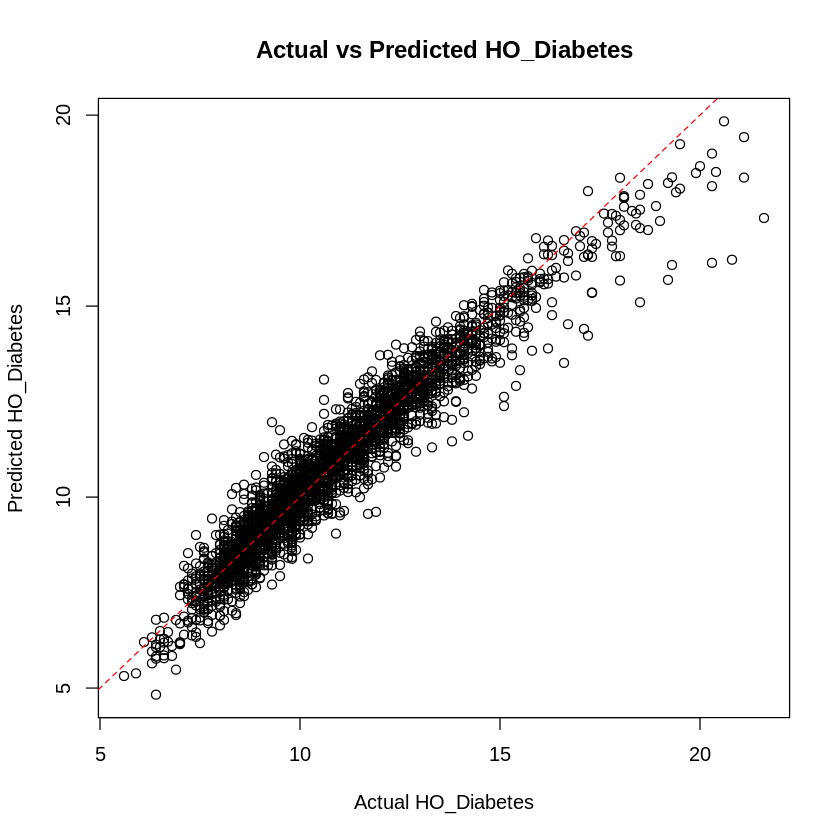

In [279]:
# Scatter plot of actual vs predicted
plot(y, y_pred, main = 'Actual vs Predicted HO_Diabetes', xlab = 'Actual HO_Diabetes', ylab = 'Predicted HO_Diabetes')
abline(0, 1, col = 'red', lty = 2)

# Store predictions in a vector
predictions_vector_full_linear <- y_pred

# Display final equation
summary(backwardStepModel)

In [280]:
# define the full model
model <- lm(y~., data = X)
k <- ols_step_backward_p(model)
k$model


Call:
lm(formula = paste(response, "~", paste(preds, collapse = " + ")), 
    data = l)

Coefficients:
               (Intercept)               HO_Teeth_lost  
                  2.513700                    0.019870  
              HO_Arthritis                 UB_Drinking  
                  0.014366                   -0.073137  
                 HO_Cancer    P_Cervical_cancer_Screen  
                 -1.077973                   -0.012515  
      P_Cholesterol_Screen                   HO_Kidney  
                  0.010328                    2.513296  
                  HO_Heart                   HO_Asthma  
                  0.308292                    0.040274  
        P_Health_insurance                  UB_Smoking  
                  0.016739                   -0.036735  
P_Colorectal_Cancer_Screen                       HO_BP  
                 -0.008127                    0.082390  
            HO_Cholesterol               P_Mammography  
                 -0.054649               

In [281]:
# take those coefficients and build a model
backwardStepModel <- lm(y~ UB_Obesity + P_general_men_65 + HO_Physical_Health + P_general_women_65 + UB_Sleep + P_BP + P_Dental + P_Routine_check_18 + HO_Teeth_lost + HO_Arthritis +HO_Cancer + P_Cholesterol_Screen + UB_Drinking + P_Cervical_cancer_Screen + HO_Kidney + HO_Heart + HO_Asthma + P_Health_insurance + UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + P_Mammography + HO_Mental_Health + UB_Physical, data = X)

In [282]:
summary(backwardStepModel)


Call:
lm(formula = y ~ UB_Obesity + P_general_men_65 + HO_Physical_Health + 
    P_general_women_65 + UB_Sleep + P_BP + P_Dental + P_Routine_check_18 + 
    HO_Teeth_lost + HO_Arthritis + HO_Cancer + P_Cholesterol_Screen + 
    UB_Drinking + P_Cervical_cancer_Screen + HO_Kidney + HO_Heart + 
    HO_Asthma + P_Health_insurance + UB_Smoking + P_Colorectal_Cancer_Screen + 
    HO_BP + HO_Cholesterol + P_Mammography + HO_Mental_Health + 
    UB_Physical, data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60168 -0.22879 -0.01754  0.21044  2.49194 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.513700   0.632117   3.977 7.15e-05 ***
UB_Obesity                  0.051850   0.002757  18.806  < 2e-16 ***
P_general_men_65           -0.015936   0.003682  -4.328 1.55e-05 ***
HO_Physical_Health         -0.086828   0.017494  -4.963 7.31e-07 ***
P_general_women_65          0.006264   0.004083   1.534 0.125078    
U

[1] "Mean Absolute Percentage Error (MAPE): 2.6047847613434"
[1] "Mean Absolute Error (MAE): 0.276546212917881"
[1] "Root Mean Squared Error (RMSE): 0.361167024073558"
[1] "Akaike Information Criterion (AIC): 2570.89140913975"



Call:
lm(formula = y ~ UB_Obesity + P_general_men_65 + HO_Physical_Health + 
    P_general_women_65 + UB_Sleep + P_BP + P_Dental + P_Routine_check_18 + 
    HO_Teeth_lost + HO_Arthritis + HO_Cancer + P_Cholesterol_Screen + 
    UB_Drinking + P_Cervical_cancer_Screen + HO_Kidney + HO_Heart + 
    HO_Asthma + P_Health_insurance + UB_Smoking + P_Colorectal_Cancer_Screen + 
    HO_BP + HO_Cholesterol + P_Mammography + HO_Mental_Health + 
    UB_Physical, data = X)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60168 -0.22879 -0.01754  0.21044  2.49194 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 2.513700   0.632117   3.977 7.15e-05 ***
UB_Obesity                  0.051850   0.002757  18.806  < 2e-16 ***
P_general_men_65           -0.015936   0.003682  -4.328 1.55e-05 ***
HO_Physical_Health         -0.086828   0.017494  -4.963 7.31e-07 ***
P_general_women_65          0.006264   0.004083   1.534 0.125078    
U

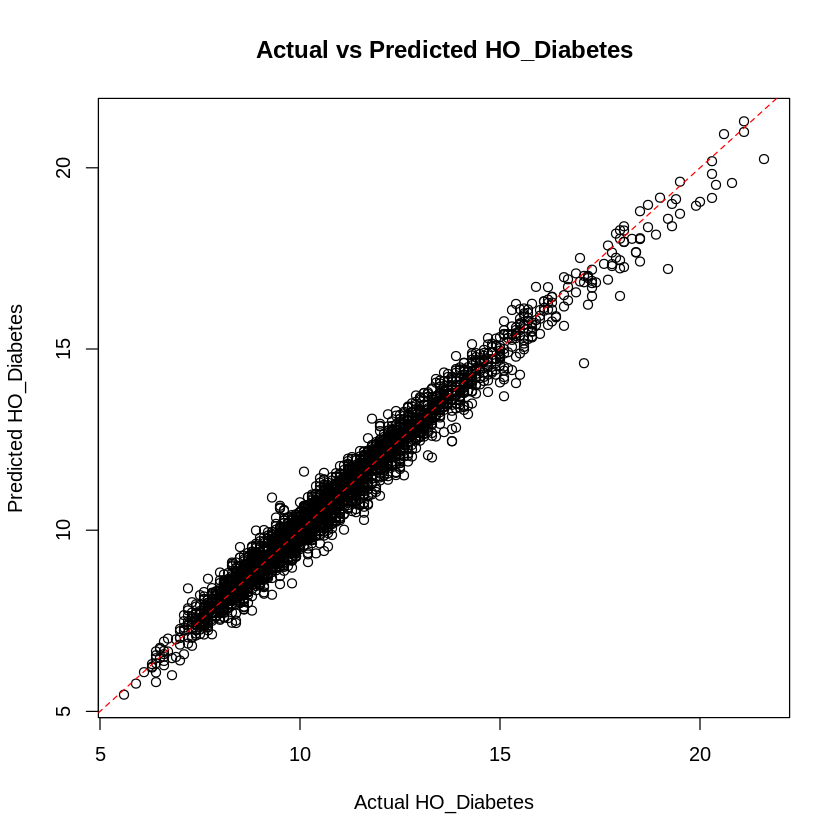

In [283]:
# Predict on the test set
y_pred <- predict(backwardStepModel, newdata = X)
# Calculate metrics
mae <- mean(abs(y - y_pred))
rmse_val <- sqrt(mean((y - y_pred)^2))
aic <- AIC(backwardStepModel)
# Calculate MAPE (Mean Absolute Percentage Error)
mape <- mean(abs((y - y_pred) / y)) * 100

# Print the MAPE
print(paste('Mean Absolute Percentage Error (MAPE):', mape))
print(paste('Mean Absolute Error (MAE):', mae))
print(paste('Root Mean Squared Error (RMSE):', rmse_val))
print(paste('Akaike Information Criterion (AIC):', aic))
# Scatter plot of actual vs predicted
plot(y, y_pred, main = 'Actual vs Predicted HO_Diabetes', xlab = 'Actual HO_Diabetes', ylab = 'Predicted HO_Diabetes')
abline(0, 1, col = 'red', lty = 2)

# Store predictions in a vector
predictions_vector_full_linear <- y_pred

# Display final equation
summary(backwardStepModel)


#Comparision between Full variable and Reduced Variable Linear Regression </br>

#Full Variabel: </br>
Number of Predictors: 27 </br>
[1] "Mean Absolute Percentage Error (MAPE): 2.60424906213251"</br>
[1] "Mean Absolute Error (MAE): 0.27642406619273"</br>
[1] "Root Mean Squared Error (RMSE): 0.361121273530802"</br>
[1] "Akaike Information Criterion (AIC): 2574.09533806393</br>

#Reduced Variable with VIF and Backward Elimination:</br>
Number of Predictors: 10 </br>
[1] "Mean Absolute Percentage Error (MAPE): 4.30125654134569"</br>
[1] "Mean Absolute Error (MAE): 0.459475508941991"</br>
[1] "Root Mean Squared Error (RMSE): 0.619727566388165"</br>
[1] "Akaike Information Criterion (AIC): 5933.87091621757"</br>

#Reduced Variable with Stepwise Backward Linear Regression </br>
Number of Predictors: 25 </br>
[1] "Mean Absolute Percentage Error (MAPE): 2.6047847613434"</br>
[1] "Mean Absolute Error (MAE): 0.276546212917881"</br>
[1] "Root Mean Squared Error (RMSE): 0.361167024073558"</br>
[1] "Akaike Information Criterion (AIC): 2570.89140913975"</br>

#Take Away: For Reduced Variable with stepwise backward elimination AIC has decrased showing imporvement over full variables model with less complexity by decreasing 2 variables and almost no change with RMSE values. Hence Reduced variables should be addopted over full variabel model.  

In [284]:
# Add the predicted values to the test set
y <- as.data.frame(y)
y_pred <- as.data.frame(y_pred)  # Convert y_pred to a dataframe if not already
results <- cbind(y, y_pred)
names(results) <- c('Actual', 'Predicted')

indices <- rownames(X)
X <- df[indices, ]

# Merge with the original data to get the region and division information
results_merged <- cbind(results, X)

# Calculate the absolute error
results_merged$Absolute_Error <- abs(results_merged$Actual - results_merged$Predicted)

# Group by region and division and calculate the mean absolute error
mean_absolute_error_by_region <- results_merged %>%
  group_by(Region) %>%
  summarise(Mean_Absolute_Error = mean(Absolute_Error))

mean_absolute_error_by_division <- results_merged %>%
  group_by(Division) %>%
  summarise(Mean_Absolute_Error = mean(Absolute_Error))


[1] "Mean absolute error by region"
# A tibble: 4 × 2
  Region    Mean_Absolute_Error
  <chr>                   <dbl>
1 Midwest                 0.265
2 Northeast               0.291
3 South                   0.258
4 West                    0.354


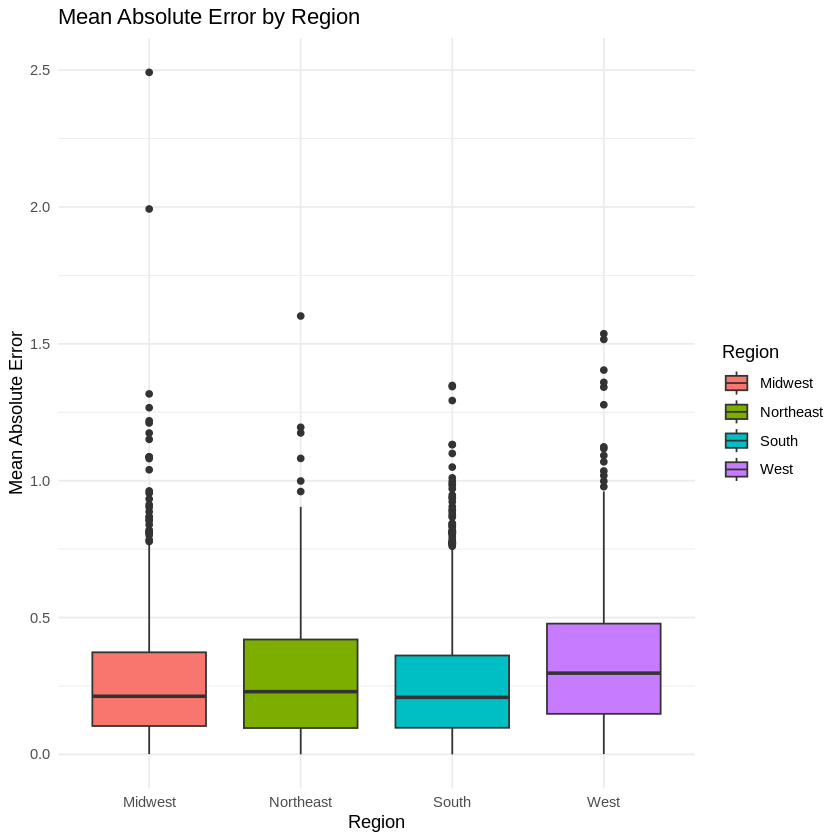

In [285]:
print("Mean absolute error by region")
print(mean_absolute_error_by_region)
# Create boxplots for mean absolute error by region and division
ggplot(results_merged, aes(x = Region, y = Absolute_Error, fill = Region))+
  geom_boxplot() +
  labs(title = "Mean Absolute Error by Region", x = "Region", y = "Mean Absolute Error") +
  theme_minimal()


[1] "Mean absolute error by Divison"
# A tibble: 4 × 2
  Region    Mean_Absolute_Error
  <chr>                   <dbl>
1 Midwest                 0.265
2 Northeast               0.291
3 South                   0.258
4 West                    0.354


Division,Mean_Absolute_Error
<chr>,<dbl>
East North Central,0.3029566
East South Central,0.2386980
Middle Atlantic,0.2585133
Mountain,0.3546107
New England,0.3646932
Pacific,0.3541212
South Atlantic,0.2659203
West North Central,0.2378710
West South Central,0.2644030


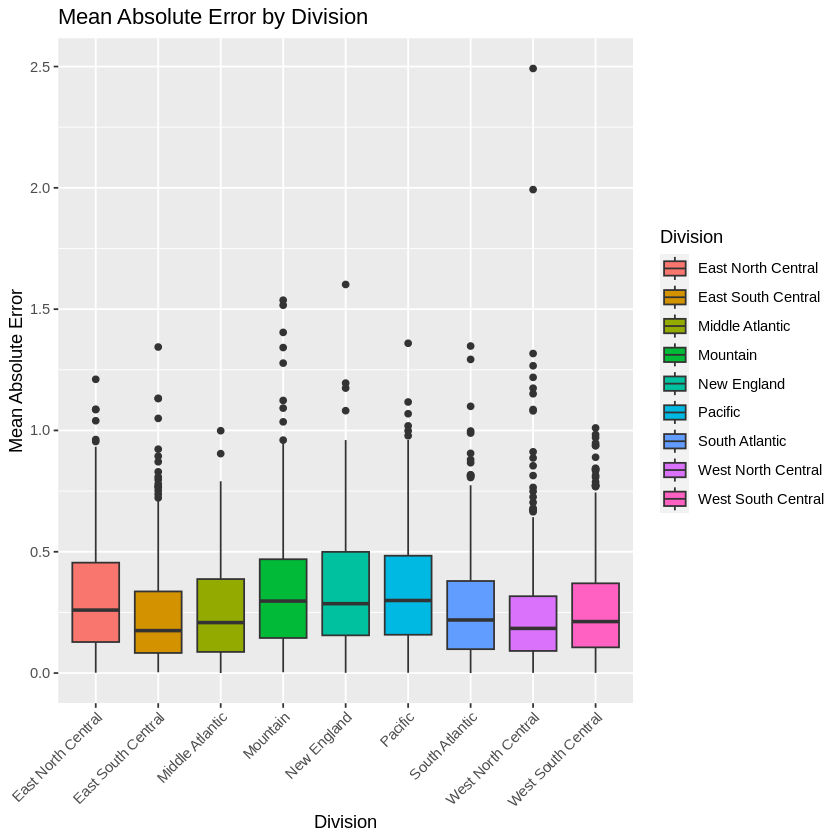

In [287]:

print("Mean absolute error by Divison")
print(mean_absolute_error_by_region)
mean_absolute_error_by_division
ggplot(results_merged, aes(x = Division, y = Absolute_Error, fill = Division)) +
  geom_boxplot() +
  labs(title = "Mean Absolute Error by Division", x = "Division", y = "Mean Absolute Error") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


**From the above 2 plots, South Region has best model with lowest MAE while New England Division has high chances of error**

##**Classification (20 pts)**
Now, create a new column called ‘Flag’ for your ONE health outcome variable. Make it a ‘1’ if the row has a value GREATER than the median. Make it a ‘0’ if it is less than or equal to the median value. Now you will fit a LOGISTIC REGRESSION for your health outcome.

●	Logistic - full variables
○	Use all the variables that make sense. Don’t use your original health outcome to predict the flag variable - this is data leakage!
○	Store your 0/1 predictions in a vector for use later.
○	Calculate AIC, confusion matrix, accuracy, TPR, TNR, FPR, FNR <br>
●	Logistic - reduced variables
○	Use stepwise forward or backwards regression.
○	Store 0/1 predictions in a vector for use later.
○	Calculate AIC, confusion matrix, accuracy, TPR, TNR, FPR, FNR


# Full Variable Logistic Regressio:

In [299]:
# Create a new column 'Flag' based on the median of the health outcome variable
median_value <- median(df$HO_Diabetes)
df$Flag <- ifelse(df$HO_Diabetes > median_value, 1, 0)

# check your work
table(df$Flag) # looks great!
# Fit a logistic regression model using all the variables except the original health outcome
X <- subset(df, select = -c(HO_Diabetes, Flag))

# Exclude non-numeric columns and re-run the logistic regression
X <- X[, sapply(X, is.numeric)]

y <- df$Flag
set.seed(42)  # Set random seed for reproducibility


# Perform logistic regression
logit_model <- glm(y ~ ., data = X, family = binomial(link = "logit"))

# Get the predictions
y_pred <- ifelse(predict(logit_model, newdata = X, type = "response") > 0.5, 1, 0)



   0    1 
1605 1537 

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


In [ ]:
install.packages('Metrics')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [289]:
library(Metrics)

In [300]:
y_pred <- as.vector(unlist(y_pred))
y_pred

[1] 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1
  [38] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  [75] 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [112] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 [149] 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0
 [186] 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0
 [223] 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 [260] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 [297] 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0
 [334] 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 [371] 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1
 [408] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 [445] 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0
 [482] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 [519] 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 [667] 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1
 [704] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1
 [815] 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0
 [852] 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 [889] 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1
 [926] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0
 [963] 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
[1000] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
[1037] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1074] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
[1111] 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1148] 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0
[1222] 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0
[1296] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
[1407] 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1
[1444] 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
[1481] 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1
[1518] 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1555] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1592] 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
[1666] 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1
[1703] 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1
[1740] 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
[1777] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [301]:
conf_matrix <- table(y_pred, y)
conf_matrix

      y
y_pred    0    1
     0 1551   65
     1   54 1472

In [302]:
# Calculate metrics
accuracy <- accuracy(y, y_pred)
recall<- recall(y, y_pred)
precision <- precision(y, y_pred)

# Calculate True Positive Rate (Sensitivity/Recall)
TPR <- conf_matrix[2,2] / sum(conf_matrix[2, ])  # True Positives / (True Positives + False Negatives)

# Calculate True Negative Rate (Specificity)
TNR <- conf_matrix[1,1] / sum(conf_matrix[1, ])  # True Negatives / (True Negatives + False Positives)


FPR <- 1 - TNR
FNR <- 1 - TPR
auc <- auc(y, y_pred)
# AIC
aic <- AIC(logit_model)


# Output the metrics
print(conf_matrix)
print(paste("Accuracy:",accuracy))
print(paste("Precision:",precision))
print(paste("True Positive Rate aka Sensitivity:",TPR))
print(paste("True Negative rate aka Specificity:",TNR))
print(paste("False Positive Rate:",FPR))
print(paste("False Negative Rate:",FNR))
print(paste("Akraine Information Creteria:",aic))
print(paste("Area under curve:",auc))
summary(logit_model)

      y
y_pred    0    1
     0 1551   65
     1   54 1472
[1] "Accuracy: 0.962126034373011"
[1] "Precision: 0.964613368283093"
[1] "True Positive Rate aka Sensitivity: 0.964613368283093"
[1] "True Negative rate aka Specificity: 0.959777227722772"
[1] "False Positive Rate: 0.0402227722772277"
[1] "False Negative Rate: 0.0353866317169069"
[1] "Akraine Information Creteria: 650.886264944892"
[1] "Area under curve: 0.962032482260016"



Call:
glm(formula = y ~ ., family = binomial(link = "logit"), data = X)

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -1.684e+01  1.104e+01  -1.524 0.127400    
HO_Teeth_lost               2.989e-02  1.066e-01   0.280 0.779161    
HO_Arthritis               -2.092e-01  1.084e-01  -1.931 0.053491 .  
UB_Drinking                -6.017e-01  8.852e-02  -6.797 1.07e-11 ***
HO_Cancer                  -7.818e+00  1.000e+00  -7.814 5.52e-15 ***
P_Cervical_cancer_Screen    1.853e-01  1.292e-01   1.434 0.151507    
P_Cholesterol_Screen       -2.098e-01  8.503e-02  -2.467 0.013608 *  
HO_Kidney                   1.015e+01  1.922e+00   5.283 1.27e-07 ***
HO_Pulmonary                1.240e+00  3.964e-01   3.129 0.001754 ** 
HO_Heart                    3.509e-01  5.833e-01   0.602 0.547438    
HO_Asthma                   3.074e-02  2.941e-01   0.105 0.916733    
P_Health_insurance          4.160e-02  4.763e-02   0.873 0.382478    
UB

#Reduced Variabel Losgistic Regression : STEPWISE LOGISTIC REGRESSION

In [ ]:
install.packages('MASS')
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘MASS’


The following object is masked from ‘package:olsrr’:

    cement


The following object is masked from ‘package:dplyr’:

    select




In [303]:
# Create a new column 'Flag' based on the median of the health outcome variable
median_value <- median(df$HO_Diabetes)
df$Flag <- ifelse(df$HO_Diabetes > median_value, 1, 0)

# Fit a logistic regression model using all the variables except the original health outcome
X <- subset(df, select = -c(HO_Diabetes, Flag))

# Exclude non-numeric columns and re-run the logistic regression
X <- X[, sapply(X, is.numeric)]

y <- df$Flag

full.model <- glm(y ~., data = X, family = binomial)
coef(full.model)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


(Intercept)              HO_Teeth_lost 
             -16.836563690                0.029885277 
              HO_Arthritis                UB_Drinking 
              -0.209219097               -0.601725133 
                 HO_Cancer   P_Cervical_cancer_Screen 
              -7.817722638                0.185316357 
      P_Cholesterol_Screen                  HO_Kidney 
              -0.209795014               10.153445335 
              HO_Pulmonary                   HO_Heart 
               1.240349809                0.350944783 
                 HO_Asthma         P_Health_insurance 
               0.030743475                0.041601350 
                UB_Smoking P_Colorectal_Cancer_Screen 
              -0.336286523                0.116029214 
                     HO_BP             HO_Cholesterol 
               0.615811089               -0.459213861 
             P_Mammography           HO_Mental_Health 
               0.039871186                0.225398655 
               UB_Physical                 UB_Obesity 
               0.150563222                0.249158621 
          P_general_men_65         P_general_women_65 
              -0.142424569               -0.134558493 
        HO_Physical_Health                   UB_Sleep 
              -0.106196320                0.108161870 
                 HO_Stroke                       P_BP 
               1.363548304                0.283960176 
                  P_Dental         P_Routine_check_18 
               0.003255179               -0.000925215

In [304]:
step.model <- stepAIC(full.model,
                      trace = TRUE) # trace = TRUE shows all output
coef(step.model)

Start:  AIC=650.89
y ~ HO_Teeth_lost + HO_Arthritis + UB_Drinking + HO_Cancer + 
    P_Cervical_cancer_Screen + P_Cholesterol_Screen + HO_Kidney + 
    HO_Pulmonary + HO_Heart + HO_Asthma + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    P_Mammography + HO_Mental_Health + UB_Physical + UB_Obesity + 
    P_general_men_65 + P_general_women_65 + HO_Physical_Health + 
    UB_Sleep + HO_Stroke + P_BP + P_Dental + P_Routine_check_18



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- P_Routine_check_18          1   594.89 648.89
- P_Dental                    1   594.89 648.89
- HO_Asthma                   1   594.90 648.90
- HO_Teeth_lost               1   594.96 648.96
- HO_Physical_Health          1   594.99 648.99
- HO_Heart                    1   595.25 649.25
- P_Mammography               1   595.32 649.32
- HO_Mental_Health            1   595.52 649.52
- P_Health_insurance          1   595.65 649.65
- HO_Stroke                   1   596.04 650.04
<none>                            594.89 650.89
- P_Cervical_cancer_Screen    1   597.02 651.02
- UB_Sleep                    1   597.24 651.24
- UB_Physical                 1   598.08 652.08
- P_Colorectal_Cancer_Screen  1   598.27 652.27
- P_general_women_65          1   598.43 652.43
- HO_Arthritis                1   598.65 652.65
- P_general_men_65            1   600.13 654.13
- P_Cholesterol_Screen        1   601.03 655.03
- UB_Smoking                  1   602.69

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=648.89
y ~ HO_Teeth_lost + HO_Arthritis + UB_Drinking + HO_Cancer + 
    P_Cervical_cancer_Screen + P_Cholesterol_Screen + HO_Kidney + 
    HO_Pulmonary + HO_Heart + HO_Asthma + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    P_Mammography + HO_Mental_Health + UB_Physical + UB_Obesity + 
    P_general_men_65 + P_general_women_65 + HO_Physical_Health + 
    UB_Sleep + HO_Stroke + P_BP + P_Dental



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- P_Dental                    1   594.89 646.89
- HO_Asthma                   1   594.90 646.90
- HO_Teeth_lost               1   594.96 646.96
- HO_Physical_Health          1   594.99 646.99
- HO_Heart                    1   595.25 647.25
- P_Mammography               1   595.36 647.36
- HO_Mental_Health            1   595.52 647.52
- P_Health_insurance          1   595.65 647.65
- HO_Stroke                   1   596.06 648.06
<none>                            594.89 648.89
- P_Cervical_cancer_Screen    1   597.26 649.26
- UB_Sleep                    1   597.39 649.39
- UB_Physical                 1   598.15 650.15
- P_Colorectal_Cancer_Screen  1   598.28 650.28
- P_general_women_65          1   598.45 650.45
- HO_Arthritis                1   598.66 650.66
- P_general_men_65            1   600.20 652.20
- P_Cholesterol_Screen        1   601.05 653.05
- UB_Smoking                  1   602.73 654.73
- HO_Pulmonary                1   605.11

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=646.89
y ~ HO_Teeth_lost + HO_Arthritis + UB_Drinking + HO_Cancer + 
    P_Cervical_cancer_Screen + P_Cholesterol_Screen + HO_Kidney + 
    HO_Pulmonary + HO_Heart + HO_Asthma + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    P_Mammography + HO_Mental_Health + UB_Physical + UB_Obesity + 
    P_general_men_65 + P_general_women_65 + HO_Physical_Health + 
    UB_Sleep + HO_Stroke + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Asthma                   1   594.90 644.90
- HO_Teeth_lost               1   594.97 644.97
- HO_Physical_Health          1   595.01 645.01
- HO_Heart                    1   595.27 645.27
- P_Mammography               1   595.37 645.37
- HO_Mental_Health            1   595.52 645.52
- P_Health_insurance          1   595.71 645.71
- HO_Stroke                   1   596.06 646.06
<none>                            594.89 646.89
- UB_Sleep                    1   597.44 647.44
- P_Cervical_cancer_Screen    1   597.55 647.55
- UB_Physical                 1   598.21 648.21
- P_Colorectal_Cancer_Screen  1   598.35 648.35
- P_general_women_65          1   598.48 648.48
- HO_Arthritis                1   598.81 648.81
- P_general_men_65            1   600.21 650.21
- P_Cholesterol_Screen        1   601.26 651.26
- UB_Smoking                  1   602.75 652.75
- HO_Pulmonary                1   605.27 655.27
- P_BP                        1   606.10

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=644.9
y ~ HO_Teeth_lost + HO_Arthritis + UB_Drinking + HO_Cancer + 
    P_Cervical_cancer_Screen + P_Cholesterol_Screen + HO_Kidney + 
    HO_Pulmonary + HO_Heart + P_Health_insurance + UB_Smoking + 
    P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + P_Mammography + 
    HO_Mental_Health + UB_Physical + UB_Obesity + P_general_men_65 + 
    P_general_women_65 + HO_Physical_Health + UB_Sleep + HO_Stroke + 
    P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Physical_Health          1   595.01 643.01
- HO_Teeth_lost               1   595.02 643.02
- HO_Heart                    1   595.27 643.27
- P_Mammography               1   595.41 643.41
- HO_Mental_Health            1   595.53 643.53
- P_Health_insurance          1   595.78 643.78
- HO_Stroke                   1   596.07 644.07
<none>                            594.90 644.90
- UB_Sleep                    1   597.50 645.50
- P_Cervical_cancer_Screen    1   597.65 645.65
- UB_Physical                 1   598.27 646.27
- P_Colorectal_Cancer_Screen  1   598.35 646.35
- P_general_women_65          1   598.56 646.56
- HO_Arthritis                1   598.82 646.82
- P_general_men_65            1   600.33 648.33
- P_Cholesterol_Screen        1   601.27 649.27
- UB_Smoking                  1   602.80 650.80
- HO_Pulmonary                1   605.29 653.29
- P_BP                        1   606.19 654.19
- HO_Cholesterol              1   606.80

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=643.01
y ~ HO_Teeth_lost + HO_Arthritis + UB_Drinking + HO_Cancer + 
    P_Cervical_cancer_Screen + P_Cholesterol_Screen + HO_Kidney + 
    HO_Pulmonary + HO_Heart + P_Health_insurance + UB_Smoking + 
    P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + P_Mammography + 
    HO_Mental_Health + UB_Physical + UB_Obesity + P_general_men_65 + 
    P_general_women_65 + UB_Sleep + HO_Stroke + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Teeth_lost               1   595.12 641.12
- HO_Heart                    1   595.28 641.28
- HO_Mental_Health            1   595.55 641.55
- P_Mammography               1   595.65 641.65
- P_Health_insurance          1   596.01 642.01
- HO_Stroke                   1   596.12 642.12
<none>                            595.01 643.01
- UB_Sleep                    1   597.58 643.58
- P_Cervical_cancer_Screen    1   597.65 643.65
- UB_Physical                 1   598.35 644.35
- P_Colorectal_Cancer_Screen  1   598.36 644.36
- P_general_women_65          1   598.95 644.95
- HO_Arthritis                1   599.48 645.48
- P_general_men_65            1   600.36 646.36
- P_Cholesterol_Screen        1   601.34 647.34
- UB_Smoking                  1   602.85 648.85
- HO_Pulmonary                1   605.42 651.42
- HO_Cholesterol              1   607.51 653.51
- P_BP                        1   608.67 654.67
- UB_Obesity                  1   622.82

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=641.12
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + HO_Heart + 
    P_Health_insurance + UB_Smoking + P_Colorectal_Cancer_Screen + 
    HO_BP + HO_Cholesterol + P_Mammography + HO_Mental_Health + 
    UB_Physical + UB_Obesity + P_general_men_65 + P_general_women_65 + 
    UB_Sleep + HO_Stroke + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Heart                    1   595.42 639.42
- HO_Mental_Health            1   595.67 639.67
- P_Mammography               1   595.75 639.75
- P_Health_insurance          1   596.21 640.21
- HO_Stroke                   1   596.41 640.41
<none>                            595.12 641.12
- UB_Sleep                    1   597.58 641.58
- P_Cervical_cancer_Screen    1   597.93 641.93
- P_Colorectal_Cancer_Screen  1   598.54 642.54
- P_general_women_65          1   599.16 643.16
- UB_Physical                 1   599.52 643.52
- HO_Arthritis                1   599.64 643.64
- P_general_men_65            1   600.52 644.52
- P_Cholesterol_Screen        1   602.39 646.39
- UB_Smoking                  1   602.85 646.85
- HO_Pulmonary                1   606.40 650.40
- HO_Cholesterol              1   607.77 651.77
- P_BP                        1   608.68 652.68
- UB_Obesity                  1   623.03 667.03
- HO_Kidney                   1   633.58

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=639.42
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    P_Mammography + HO_Mental_Health + UB_Physical + UB_Obesity + 
    P_general_men_65 + P_general_women_65 + UB_Sleep + HO_Stroke + 
    P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Mental_Health            1   595.99 637.99
- P_Mammography               1   596.15 638.15
- HO_Stroke                   1   596.64 638.64
- P_Health_insurance          1   596.83 638.83
<none>                            595.42 639.42
- P_Cervical_cancer_Screen    1   598.02 640.02
- UB_Sleep                    1   598.19 640.19
- P_Colorectal_Cancer_Screen  1   598.71 640.71
- P_general_women_65          1   599.61 641.61
- HO_Arthritis                1   599.68 641.68
- UB_Physical                 1   599.77 641.77
- P_general_men_65            1   600.65 642.65
- UB_Smoking                  1   603.02 645.02
- P_Cholesterol_Screen        1   603.60 645.60
- HO_Cholesterol              1   607.85 649.85
- P_BP                        1   609.11 651.11
- HO_Pulmonary                1   609.11 651.11
- UB_Obesity                  1   623.14 665.14
- HO_Kidney                   1   643.01 685.01
- HO_BP                       1   650.76

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=637.99
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    P_Mammography + UB_Physical + UB_Obesity + P_general_men_65 + 
    P_general_women_65 + UB_Sleep + HO_Stroke + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- P_Mammography               1   596.64 636.64
- HO_Stroke                   1   597.18 637.18
- P_Health_insurance          1   597.62 637.62
<none>                            595.99 637.99
- P_Cervical_cancer_Screen    1   598.97 638.97
- P_Colorectal_Cancer_Screen  1   599.34 639.34
- UB_Sleep                    1   599.50 639.50
- HO_Arthritis                1   599.69 639.69
- P_general_women_65          1   600.03 640.03
- UB_Physical                 1   600.54 640.54
- P_general_men_65            1   601.28 641.28
- UB_Smoking                  1   603.46 643.46
- P_Cholesterol_Screen        1   605.70 645.70
- HO_Cholesterol              1   607.90 647.90
- P_BP                        1   609.13 649.13
- HO_Pulmonary                1   617.20 657.20
- UB_Obesity                  1   623.18 663.18
- HO_Kidney                   1   644.39 684.39
- HO_BP                       1   651.59 691.59
- UB_Drinking                 1   662.48

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=636.64
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    UB_Physical + UB_Obesity + P_general_men_65 + P_general_women_65 + 
    UB_Sleep + HO_Stroke + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- HO_Stroke                   1   597.75 635.75
- P_Health_insurance          1   598.19 636.19
<none>                            596.64 636.64
- P_Cervical_cancer_Screen    1   599.86 637.86
- P_general_women_65          1   600.04 638.04
- UB_Physical                 1   601.15 639.15
- HO_Arthritis                1   601.33 639.33
- UB_Sleep                    1   601.63 639.63
- P_Colorectal_Cancer_Screen  1   602.00 640.00
- UB_Smoking                  1   603.98 641.98
- P_general_men_65            1   604.47 642.47
- P_Cholesterol_Screen        1   605.82 643.82
- HO_Cholesterol              1   609.19 647.19
- P_BP                        1   612.19 650.19
- HO_Pulmonary                1   617.61 655.61
- UB_Obesity                  1   623.97 661.97
- HO_Kidney                   1   645.55 683.55
- HO_BP                       1   653.31 691.31
- UB_Drinking                 1   662.56 700.56
- HO_Cancer                   1   691.75

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=635.75
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + P_Health_insurance + 
    UB_Smoking + P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + 
    UB_Physical + UB_Obesity + P_general_men_65 + P_general_women_65 + 
    UB_Sleep + P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- P_Health_insurance          1   599.73 635.73
<none>                            597.75 635.75
- P_Cervical_cancer_Screen    1   600.33 636.33
- P_general_women_65          1   600.72 636.72
- HO_Arthritis                1   602.03 638.03
- UB_Sleep                    1   602.60 638.60
- UB_Physical                 1   602.70 638.70
- P_Colorectal_Cancer_Screen  1   603.68 639.68
- UB_Smoking                  1   604.11 640.11
- P_general_men_65            1   605.67 641.67
- P_Cholesterol_Screen        1   607.87 643.87
- HO_Cholesterol              1   610.79 646.79
- P_BP                        1   613.68 649.68
- HO_Pulmonary                1   618.71 654.71
- UB_Obesity                  1   624.00 660.00
- HO_BP                       1   657.54 693.54
- UB_Drinking                 1   663.94 699.94
- HO_Cancer                   1   691.76 727.76
- HO_Kidney                   1   777.99 813.99


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Step:  AIC=635.73
y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + UB_Smoking + 
    P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + UB_Physical + 
    UB_Obesity + P_general_men_65 + P_general_women_65 + UB_Sleep + 
    P_BP



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
<none>                            599.73 635.73
- P_general_women_65          1   602.22 636.22
- P_Cervical_cancer_Screen    1   602.33 636.33
- UB_Sleep                    1   604.06 638.06
- P_Colorectal_Cancer_Screen  1   604.80 638.80
- UB_Physical                 1   605.87 639.87
- HO_Arthritis                1   606.74 640.74
- UB_Smoking                  1   608.40 642.40
- P_general_men_65            1   608.81 642.81
- P_Cholesterol_Screen        1   610.33 644.33
- HO_Cholesterol              1   611.02 645.02
- P_BP                        1   615.79 649.79
- HO_Pulmonary                1   623.19 657.19
- UB_Obesity                  1   628.75 662.75
- HO_BP                       1   658.86 692.86
- UB_Drinking                 1   668.04 702.04
- HO_Cancer                   1   696.33 730.33
- HO_Kidney                   1   821.12 855.12


(Intercept)               HO_Arthritis 
              -13.09106935                -0.23227601 
               UB_Drinking                  HO_Cancer 
               -0.61169449                -7.63306813 
  P_Cervical_cancer_Screen       P_Cholesterol_Screen 
                0.17043224                -0.24290641 
                 HO_Kidney               HO_Pulmonary 
               12.17170836                 1.50681428 
                UB_Smoking P_Colorectal_Cancer_Screen 
               -0.31752739                 0.12629575 
                     HO_BP             HO_Cholesterol 
                0.64182714                -0.41331325 
               UB_Physical                 UB_Obesity 
                0.17409824                 0.24410158 
          P_general_men_65         P_general_women_65 
               -0.16486391                -0.09687723 
                  UB_Sleep                       P_BP 
                0.12564488                 0.29170938

In [305]:
# Get the predictions
y_pred <- ifelse(predict(step.model, newdata = X, type = "response") > 0.5, 1, 0)
# Calculate metrics
conf_matrix<- table(y_pred, y)
accuracy <- accuracy(y, y_pred)
recall<- recall(y, y_pred)
precision <- precision(y, y_pred)

# Calculate True Positive Rate (Sensitivity/Recall)
TPR <- conf_matrix[2,2] / sum(conf_matrix[2, ])  # True Positives / (True Positives + False Negatives)

# Calculate True Negative Rate (Specificity)
TNR <- conf_matrix[1,1] / sum(conf_matrix[1, ])  # True Negatives / (True Negatives + False Positives)


FPR <- 1 - TNR
FNR <- 1 - TPR
auc <- auc(y, y_pred)
# AIC
aic <- AIC(step.model)


# Output the metrics
print(conf_matrix)
print(paste("Accuracy:",accuracy))
print(paste("Precision:",precision))
print(paste("True Positive Rate aka Sensitivity:",TPR))
print(paste("True Negative rate aka Specificity:",TNR))
print(paste("False Positive Rate:",FPR))
print(paste("False Negative Rate:",FNR))
print(paste("Akraine Information Creteria:",aic))
print(paste("Area under curve:",auc))
summary(step.model)

      y
y_pred    0    1
     0 1552   65
     1   53 1472
[1] "Accuracy: 0.962444302991725"
[1] "Precision: 0.965245901639344"
[1] "True Positive Rate aka Sensitivity: 0.965245901639344"
[1] "True Negative rate aka Specificity: 0.959802102659245"
[1] "False Positive Rate: 0.0401978973407545"
[1] "False Negative Rate: 0.0347540983606557"
[1] "Akraine Information Creteria: 635.726824198206"
[1] "Area under curve: 0.962344008739767"



Call:
glm(formula = y ~ HO_Arthritis + UB_Drinking + HO_Cancer + P_Cervical_cancer_Screen + 
    P_Cholesterol_Screen + HO_Kidney + HO_Pulmonary + UB_Smoking + 
    P_Colorectal_Cancer_Screen + HO_BP + HO_Cholesterol + UB_Physical + 
    UB_Obesity + P_general_men_65 + P_general_women_65 + UB_Sleep + 
    P_BP, family = binomial, data = X)

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)                -13.09107    9.36468  -1.398 0.162137    
HO_Arthritis                -0.23228    0.08843  -2.627 0.008624 ** 
UB_Drinking                 -0.61169    0.08109  -7.543 4.59e-14 ***
HO_Cancer                   -7.63307    0.90600  -8.425  < 2e-16 ***
P_Cervical_cancer_Screen     0.17043    0.11025   1.546 0.122152    
P_Cholesterol_Screen        -0.24291    0.07563  -3.212 0.001320 ** 
HO_Kidney                   12.17171    1.05480  11.539  < 2e-16 ***
HO_Pulmonary                 1.50681    0.32049   4.702 2.58e-06 ***
UB_Smoking           

#Comparision of Full variable and Reduced variable logistic regression
</br>

#Full Variable

Numer of Predictors: 27</br>
[1] "Accuracy: 0.962126034373011"</br>
[1] "Precision: 0.964613368283093"</br>
[1] "True Positive Rate aka Sensitivity: 0.964613368283093"</br>
[1] "True Negative rate aka Specificity: 0.959777227722772"</br>
[1] "False Positive Rate: 0.0402227722772277"</br>
[1] "False Negative Rate: 0.0353866317169069"</br>
[1] "Akraine Information Creteria: 650.886264944892"</br>
[1] "Area under curve: 0.962032482260016"</br>

#Reduced Variabel

Numer of Predictors: 17</br>
[1] "Accuracy: 0.962444302991725"</br>
[1] "Precision: 0.965245901639344"</br>
[1] "True Positive Rate aka Sensitivity: 0.965245901639344"</br>
[1] "True Negative rate aka Specificity: 0.959802102659245"</br>
[1] "False Positive Rate: 0.0401978973407545"</br>
[1] "False Negative Rate: 0.0347540983606557"</br>
[1] "Akraine Information Creteria: 635.726824198206"</br>
[1] "Area under curve: 0.962344008739767"</br>

#Take Away: For Reduced Variable AIC has decrased showing imporvement over full variables model with less complexity by decreasing 10 variables and almost no change with Accuracy values. Hence Reduced variables should be addopted over full variabel model.  

In [306]:
# Add the predicted values to the test set
y <- as.data.frame(y)
y_pred <- as.data.frame(y_pred)  # Convert y_pred to a dataframe if not already
results <- cbind(y, y_pred)
names(results) <- c('Actual', 'Predicted')

indices <- rownames(X)
X <- df[indices, ]

# Merge with the original data to get the region and division information
results_merged <- cbind(results, X)

# Calculate the absolute error
results_merged$Correct_Prediction <- as.integer(as.logical(results_merged$Actual == results_merged$Predicted))

# Group by region and division and calculate the mean absolute error
Accuracy_by_region <- results_merged %>%
  group_by(Region) %>%
  summarise(Correct_Prediction = mean(Correct_Prediction))

accuracy_by_division <- results_merged %>%
  group_by(Division) %>%
  summarise(Correct_Prediction = mean(Correct_Prediction))


[1] "Accuracy by region"
# A tibble: 4 × 2
  Region    Correct_Prediction
  <chr>                  <dbl>
1 Midwest                0.957
2 Northeast              0.972
3 South                  0.969
4 West                   0.949


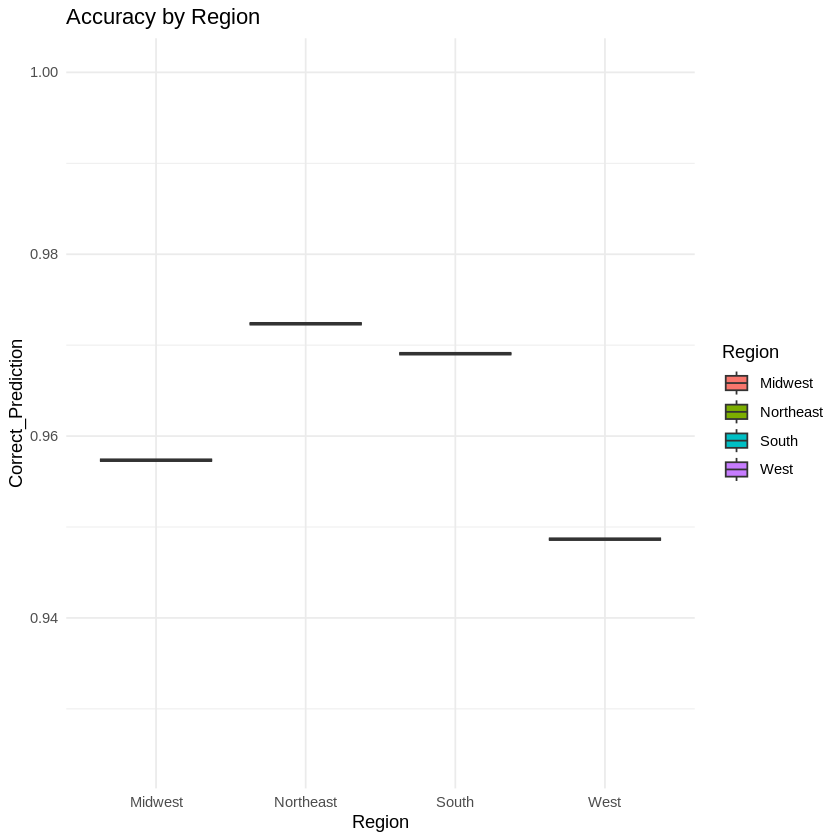

In [307]:
print("Accuracy by region")
print(Accuracy_by_region)
# Create boxplots for Accuracy by region and division
ggplot(Accuracy_by_region, aes(x = Region, y = Correct_Prediction, fill = Region))+
  geom_boxplot() +
  labs(title = "Accuracy by Region", x = "Region", y = "Correct_Prediction") +
  theme_minimal() +
  ylim(0.925,1)


#**Insight**</br>
**Northeast has highest correct predictions and West has least correct predictions**

[1] "Accuracy by Division"
# A tibble: 9 × 2
  Division           Correct_Prediction
  <chr>                           <dbl>
1 East North Central              0.936
2 East South Central              0.981
3 Middle Atlantic                 0.967
4 Mountain                        0.936
5 New England                     0.985
6 Pacific                         0.970
7 South Atlantic                  0.959
8 West North Central              0.972
9 West South Central              0.972


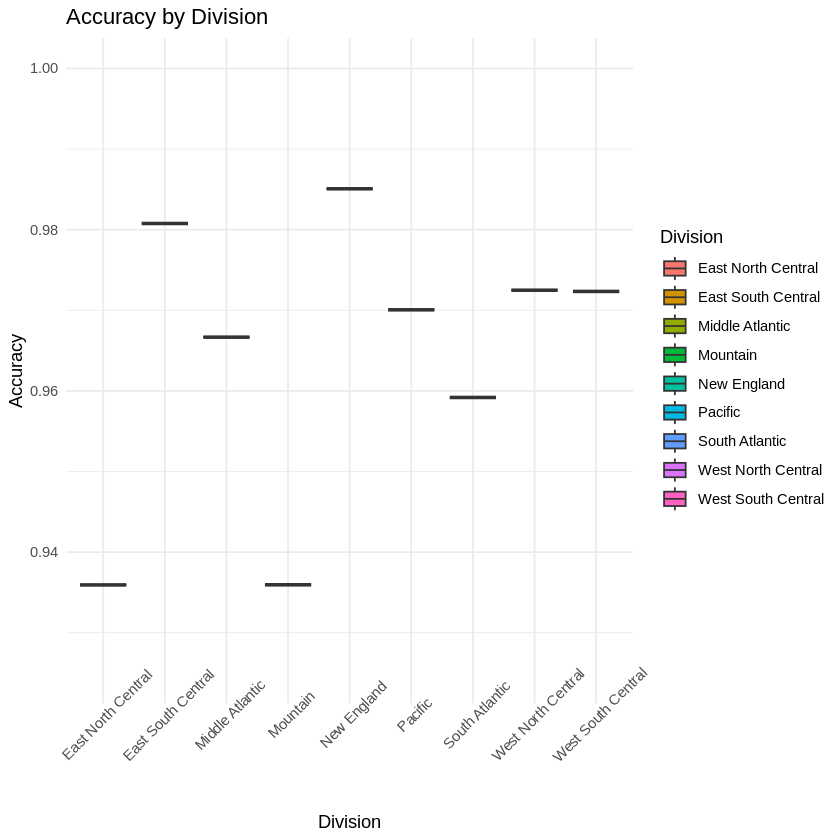

In [308]:
print("Accuracy by Division")
print(accuracy_by_division)
# Create boxplots for Accuracy by Division and division
ggplot(accuracy_by_division, aes(x = Division, y = Correct_Prediction, fill = Division))+
  geom_boxplot() +
  labs(title = "Accuracy by Division", x = "Division", y = "Accuracy") +
  theme_minimal() +
  ylim(0.925,1) +
  theme(axis.text.x = element_text(angle = 45))


In [309]:
#census_data[,c('Region', 'Division')].drop_duplicates()
group_by(census_data[,c('Region', 'Division')], Region, Division) %>% slice(1)

Region,Division
<chr>,<chr>
Midwest,East North Central
Midwest,West North Central
Northeast,Middle Atlantic
Northeast,New England
South,East South Central
South,South Atlantic
South,West South Central
West,Mountain
West,Pacific


##Insight from Mean accuracy plots
**Mountain from West and East North Central froom Midwest is comparatively performing low**

#**Conclusion (2.5 pts)** <dr>
Wrap it up and say something about health in the United States and any next steps you would be interested in pursuing in the future. Be creative and generalize about your conclusions, talk about the value of your analysis. Make sure your ‘works cited’ page is at the end of your document.




The analysis emphasizes how many health conditions and the risk of diabetes in the US are intricately related. It sheds light on the interactions between the risk of diabetes and lifestyle decisions, preventative actions, and health consciousness. The results highlight the complex nature of health dynamics by revealing both predicted and unanticipated relationships.

During this investigation, we have found some noteworthy patterns:</br>
**Lifestyle Impact:** Consistent with accepted health paradigms, lifestyle factors such as obesity, exercise habits, sleep patterns, and smoking show a substantial correlation with the risk of diabetes.</br>
**Astonishing Findings:** Contrary to popular belief, drinking alcohol seems to be associated with a decreased risk of developing diabetes, suggesting that this relationship merits more research.

The significance of holistic health issues and the need for nuanced methods in health management are emphasized by this investigation. It underscores the need of data-driven decision-making and ongoing investigation in the healthcare industry, as well as the usefulness of predictive modeling in revealing insights that defy assumptions.

Richer insights may be forthcoming from future research that delves further into regional disparities, socioeconomic effects, and longitudinal investigations. Improved health outcomes for a variety of populations and more focused preventative efforts may result from investigating interventions and customized healthcare methods based on predictive models.

In the end, this research provides a fundamental step toward comprehending health intricacies and establishes the framework for well-informed decision-making to improve individual well-being and public health policy in the United States.
